In [246]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.linear_model import LinearRegression

In [247]:
# Open csv file
efficiency_fva = pd.read_csv('offensive_efficiency_scores.csv')

In [248]:
# See first five games in the file
efficiency_fva.head()

DateOfGame      Team        Opponent  PointsScored  FieldGoalAttempts  \
0   12/3/2020  Kaukauna  Appleton North            73                 51   
1   12/4/2020  Kaukauna    Oshkosh West            72                 48   
2   12/8/2020  Kaukauna   Appleton East            86                 56   
3  12/11/2020  Kaukauna     Hortonville            72                 55   
4  12/12/2020  Kaukauna         De Pere            61                 54   

   FieldGoalsMade  OffensiveRebounds  Assists  Turnovers WinOrLoss  \
0              20                 10        7         11       Win   
1              25                  3       14         10       Win   
2              27                  6       14         15       Win   
3              25                 12       14         21       Win   
4              21                  6       13          7      Loss   

   OffensiveEfficiency  EfficientPointsScored     RawEOP  
0             0.457627              33.406780  35.841356  
1             0.565217              40.695652  46.709565  
2             0.518987              44.632911  50.154937  
3             0.500000              36.000000  41.320000  
4             0.500000              30.500000  35.440000

In [249]:
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

DateOfGame      Team        Opponent  PointsScored  FieldGoalAttempts  \
0   12/3/2020  Kaukauna  Appleton North            73                 51   
1   12/4/2020  Kaukauna    Oshkosh West            72                 48   
2   12/8/2020  Kaukauna   Appleton East            86                 56   
3  12/11/2020  Kaukauna     Hortonville            72                 55   
4  12/12/2020  Kaukauna         De Pere            61                 54   

   FieldGoalsMade  OffensiveRebounds  Assists  Turnovers WinOrLoss  \
0              20                 10        7         11       Win   
1              25                  3       14         10       Win   
2              27                  6       14         15       Win   
3              25                 12       14         21       Win   
4              21                  6       13          7      Loss   

   OffensiveEfficiency  EfficientPointsScored     RawEOP  Loss  Win  
0             0.457627              33.406780  35.841356     0    1  
1             0.565217              40.695652  46.709565     0    1  
2             0.518987              44.632911  50.154937     0    1  
3             0.500000              36.000000  41.320000     0    1  
4             0.500000              30.500000  35.440000     1    0

In [250]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [251]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

PointsScored  FieldGoalAttempts  FieldGoalsMade  OffensiveRebounds  \
count    111.000000         111.000000      111.000000         111.000000   
mean      73.594595          52.981982       26.792793           8.765766   
std       12.725335           9.008059        5.980449           4.118594   
min       48.000000          35.000000       14.000000           1.000000   
25%       65.000000          46.000000       22.000000           5.000000   
50%       73.000000          52.000000       27.000000           9.000000   
75%       82.000000          60.000000       31.000000          12.000000   
max      108.000000          75.000000       43.000000          19.000000   

          Assists   Turnovers  OffensiveEfficiency  EfficientPointsScored  \
count  111.000000  111.000000           111.000000             111.000000   
mean    16.063063   11.207207             0.594511              44.458788   
std      4.851015    3.675761             0.079898              12.662127   
min      7.000000    4.000000             0.403226              20.210526   
25%     12.500000    8.000000             0.534903              35.044151   
50%     16.000000   11.000000             0.592105              43.029412   
75%     19.000000   13.000000             0.653939              52.473514   
max     30.000000   21.000000             0.784091              82.329545   

           RawEOP  
count  111.000000  
mean    51.644344  
std     15.185803  
min     23.090526  
25%     39.597783  
50%     50.154937  
75%     61.653307  
max     97.823182

In [252]:
# Now losses
loss.describe()

PointsScored  FieldGoalAttempts  FieldGoalsMade  OffensiveRebounds  \
count     95.000000          95.000000       95.000000          95.000000   
mean      59.389474          50.400000       21.336842           7.389474   
std       10.927512           7.251412        4.732438           3.537924   
min       34.000000          25.000000       11.000000           1.000000   
25%       53.000000          45.500000       18.000000           5.000000   
50%       59.000000          52.000000       22.000000           7.000000   
75%       65.500000          55.000000       24.000000          10.000000   
max       83.000000          72.000000       33.000000          21.000000   

         Assists  Turnovers  OffensiveEfficiency  EfficientPointsScored  \
count  95.000000  95.000000            95.000000              95.000000   
mean   12.221053  13.431579             0.487196              29.525216   
std     4.263100   4.982208             0.085003               9.503736   
min     4.000000   0.000000             0.307692              11.213115   
25%     9.000000  10.000000             0.417194              21.769231   
50%    12.000000  13.000000             0.486486              28.741935   
75%    14.500000  16.000000             0.538865              35.291111   
max    28.000000  26.000000             0.693878              54.296703   

          RawEOP  
count  95.000000  
mean   34.180564  
std    11.328524  
min    12.870164  
25%    24.798992  
50%    33.690909  
75%    41.252015  
max    68.561319

In [253]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.560294        0.908978   
FieldGoalAttempts          0.560294           1.000000        0.650326   
FieldGoalsMade             0.908978           0.650326        1.000000   
OffensiveRebounds          0.221714           0.605257        0.275308   
Assists                    0.641370           0.380906        0.692107   
Turnovers                 -0.213477          -0.149060       -0.214281   
OffensiveEfficiency        0.763010           0.270121        0.813063   
EfficientPointsScored      0.946884           0.465331        0.923011   
RawEOP                     0.926135           0.461133        0.916692   
Loss                      -0.512237          -0.154969       -0.448855   
Win                        0.512237           0.154969        0.448855   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.221714  0.641370  -0.213477   
FieldGoalAttempts               0.605257  0.380906  -0.149060   
FieldGoalsMade                  0.275308  0.692107  -0.214281   
OffensiveRebounds               1.000000  0.146667   0.055570   
Assists                         0.146667  1.000000  -0.184728   
Turnovers                       0.055570 -0.184728   1.000000   
OffensiveEfficiency             0.177058  0.765592  -0.475383   
EfficientPointsScored           0.225607  0.747625  -0.357321   
RawEOP                          0.226365  0.803648  -0.346526   
Loss                           -0.175741 -0.386718   0.249373   
Win                             0.175741  0.386718  -0.249373   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.763010               0.946884  0.926135   
FieldGoalAttempts                 0.270121               0.465331  0.461133   
FieldGoalsMade                    0.813063               0.923011  0.916692   
OffensiveRebounds                 0.177058               0.225607  0.226365   
Assists                           0.765592               0.747625  0.803648   
Turnovers                        -0.475383              -0.357321 -0.346526   
OffensiveEfficiency               1.000000               0.916259  0.924695   
EfficientPointsScored             0.916259               1.000000  0.993782   
RawEOP                            0.924695               0.993782  1.000000   
Loss                             -0.546910              -0.551434 -0.542521   
Win                               0.546910               0.551434  0.542521   

                           Loss       Win  
PointsScored          -0.512237  0.512237  
FieldGoalAttempts     -0.154969  0.154969  
FieldGoalsMade        -0.448855  0.448855  
OffensiveRebounds     -0.175741  0.175741  
Assists               -0.386718  0.386718  
Turnovers              0.249373 -0.249373  
OffensiveEfficiency   -0.546910  0.546910  
EfficientPointsScored -0.551434  0.551434  
RawEOP                -0.542521  0.542521  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

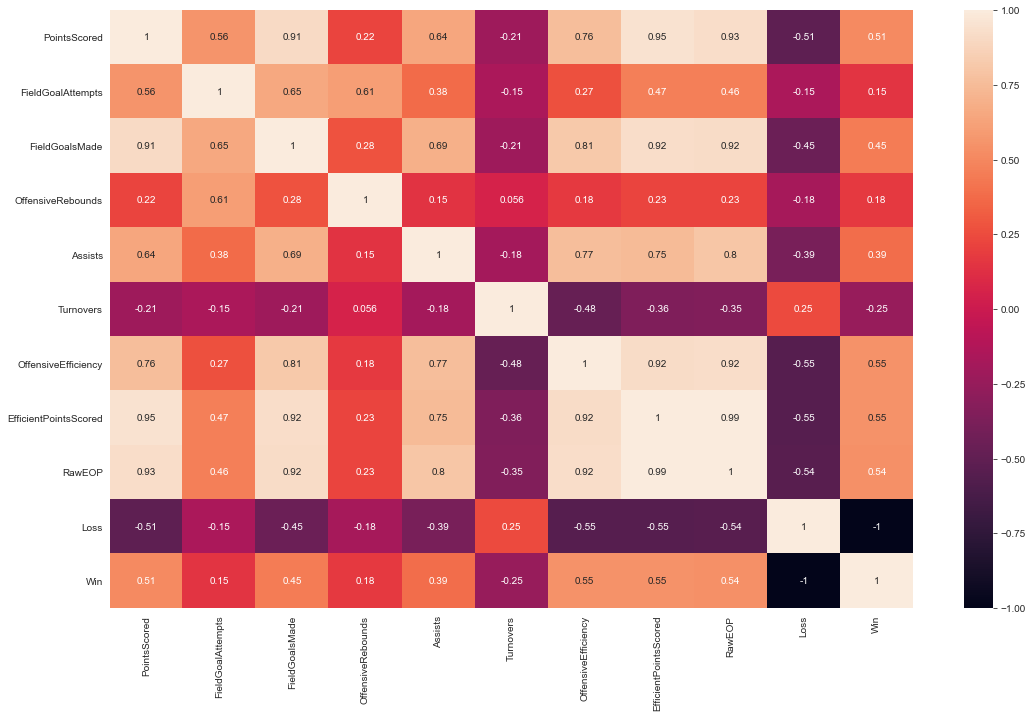

In [254]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

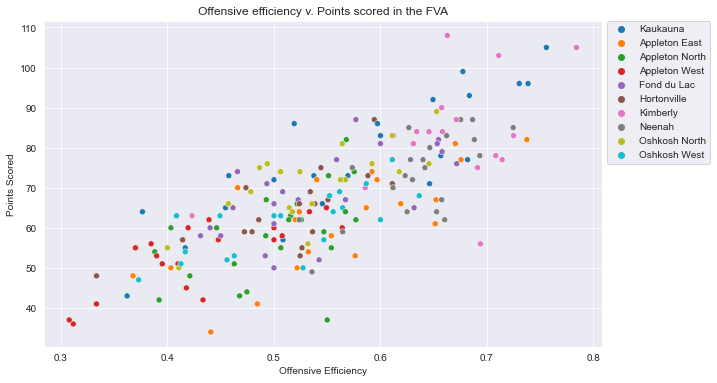

In [255]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="Team",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Points scored in the FVA");



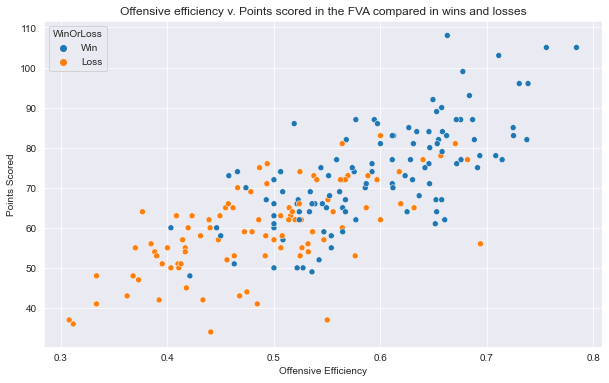

In [256]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");


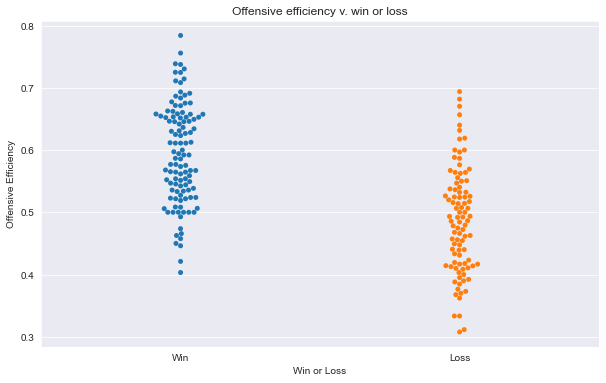

In [257]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

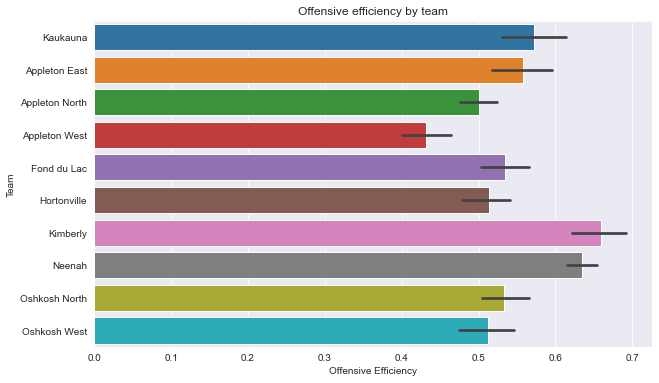

In [258]:
plt.figure(figsize=(10,6))
sns.barplot(x="OffensiveEfficiency", y="Team", data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

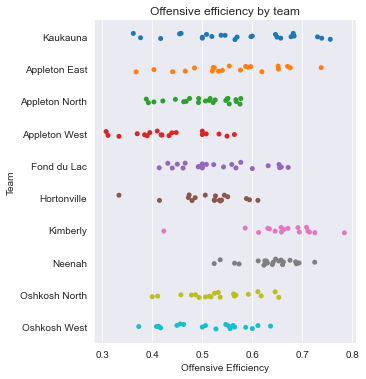

In [259]:
# Checking team by team offensive efficency 
plt.figure(figsize=(10,6))
sns.catplot(x = "OffensiveEfficiency", y = "Team", data = efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

<Figure size 720x432 with 0 Axes>

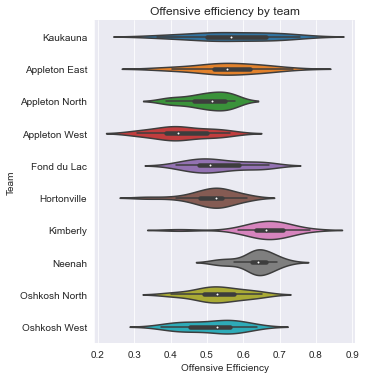

In [260]:
# Checking consistency of teams
plt.figure(figsize=(10,6))
sns.catplot(x="OffensiveEfficiency",y="Team",data=efficiency_fva, kind = 'violin')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Team")
plt.title("Offensive efficiency by team");

In [261]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [262]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [263]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [264]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [265]:
# Appleton East offense correlations
appleton_east_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.548783        0.881800   
FieldGoalAttempts          0.548783           1.000000        0.602659   
FieldGoalsMade             0.881800           0.602659        1.000000   
OffensiveRebounds         -0.034491           0.313734       -0.145779   
Assists                    0.832931           0.532638        0.912206   
Turnovers                 -0.118003           0.054584       -0.166268   
OffensiveEfficiency        0.737552           0.180008        0.801672   
EfficientPointsScored      0.936046           0.406383        0.909829   
RawEOP                     0.928280           0.445699        0.921115   
Loss                      -0.291570           0.179599       -0.160326   
Win                        0.291570          -0.179599        0.160326   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.034491  0.832931  -0.118003   
FieldGoalAttempts               0.313734  0.532638   0.054584   
FieldGoalsMade                 -0.145779  0.912206  -0.166268   
OffensiveRebounds               1.000000 -0.145861   0.178066   
Assists                        -0.145861  1.000000  -0.227306   
Turnovers                       0.178066 -0.227306   1.000000   
OffensiveEfficiency            -0.092840  0.806531  -0.534036   
EfficientPointsScored          -0.077351  0.898921  -0.336039   
RawEOP                         -0.070034  0.925117  -0.324496   
Loss                           -0.111612 -0.292329   0.304257   
Win                             0.111612  0.292329  -0.304257   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.737552               0.936046  0.928280   
FieldGoalAttempts                 0.180008               0.406383  0.445699   
FieldGoalsMade                    0.801672               0.909829  0.921115   
OffensiveRebounds                -0.092840              -0.077351 -0.070034   
Assists                           0.806531               0.898921  0.925117   
Turnovers                        -0.534036              -0.336039 -0.324496   
OffensiveEfficiency               1.000000               0.918083  0.904675   
EfficientPointsScored             0.918083               1.000000  0.995203   
RawEOP                            0.904675               0.995203  1.000000   
Loss                             -0.477658              -0.401473 -0.381657   
Win                               0.477658               0.401473  0.381657   

                           Loss       Win  
PointsScored          -0.291570  0.291570  
FieldGoalAttempts      0.179599 -0.179599  
FieldGoalsMade        -0.160326  0.160326  
OffensiveRebounds     -0.111612  0.111612  
Assists               -0.292329  0.292329  
Turnovers              0.304257 -0.304257  
OffensiveEfficiency   -0.477658  0.477658  
EfficientPointsScored -0.401473  0.401473  
RawEOP                -0.381657  0.381657  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [266]:
# Appleton East offense compared in wins and losses 
appleton_east_win = appleton_east_num[appleton_east_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_east_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_east_loss = appleton_east_num[appleton_east_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_east_offense = pd.concat(frames)
appleton_east_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          8.000000           8.000000        8.000000   
Averages in Wins       66.625000          45.250000       23.500000   
Number of Losses       13.000000          13.000000       13.000000   
Averages in Losses     59.076923          47.692308       21.769231   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               8.000000   8.000000   8.000000   
Averages in Wins             6.000000  18.375000   9.750000   
Number of Losses            13.000000  13.000000  13.000000   
Averages in Losses           5.230769  15.307692  12.615385   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 8.000000               8.000000   8.000000  
Averages in Wins               0.613546              41.436217  49.561076  
Number of Losses              13.000000              13.000000  13.000000  
Averages in Losses             0.523339              31.687707  37.795124

In [267]:
# Appleton East defense correlations
appleton_east_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.237122        0.837748   
FieldGoalAttempts          0.237122           1.000000        0.500233   
FieldGoalsMade             0.837748           0.500233        1.000000   
OffensiveRebounds         -0.286905           0.642947       -0.067253   
Assists                    0.577379           0.089190        0.627925   
Turnovers                 -0.453190          -0.217677       -0.462554   
OffensiveEfficiency        0.758520           0.042435        0.798038   
EfficientPointsScored      0.944193           0.170559        0.875525   
RawEOP                     0.927449           0.164772        0.876282   
Loss                      -0.446818          -0.174450       -0.438304   
Win                        0.446818           0.174450        0.438304   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.286905  0.577379  -0.453190   
FieldGoalAttempts               0.642947  0.089190  -0.217677   
FieldGoalsMade                 -0.067253  0.627925  -0.462554   
OffensiveRebounds               1.000000 -0.492632  -0.038338   
Assists                        -0.492632  1.000000  -0.368847   
Turnovers                      -0.038338 -0.368847   1.000000   
OffensiveEfficiency            -0.296141  0.720737  -0.719683   
EfficientPointsScored          -0.284719  0.669491  -0.628601   
RawEOP                         -0.309629  0.723098  -0.636649   
Loss                            0.195561 -0.350813   0.048346   
Win                            -0.195561  0.350813  -0.048346   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.758520               0.944193  0.927449   
FieldGoalAttempts                 0.042435               0.170559  0.164772   
FieldGoalsMade                    0.798038               0.875525  0.876282   
OffensiveRebounds                -0.296141              -0.284719 -0.309629   
Assists                           0.720737               0.669491  0.723098   
Turnovers                        -0.719683              -0.628601 -0.636649   
OffensiveEfficiency               1.000000               0.925615  0.941216   
EfficientPointsScored             0.925615               1.000000  0.996805   
RawEOP                            0.941216               0.996805  1.000000   
Loss                             -0.291132              -0.389615 -0.389461   
Win                               0.291132               0.389615  0.389461   

                           Loss       Win  
PointsScored          -0.446818  0.446818  
FieldGoalAttempts     -0.174450  0.174450  
FieldGoalsMade        -0.438304  0.438304  
OffensiveRebounds      0.195561 -0.195561  
Assists               -0.350813  0.350813  
Turnovers              0.048346 -0.048346  
OffensiveEfficiency   -0.291132  0.291132  
EfficientPointsScored -0.389615  0.389615  
RawEOP                -0.389461  0.389461  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [268]:
# Appleton East opponent's offense compared in wins and losses 
appleton_east_win_opp = appleton_east_opp_num[appleton_east_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_east_loss_opp = appleton_east_opp_num[appleton_east_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_east_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_east_opponent = pd.concat(frames)
appleton_east_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          6.000000           6.000000        6.000000   
Averages in Wins       61.000000          52.166667       23.166667   
Number of Losses        9.000000           9.000000        9.000000   
Averages in Losses     72.444444          54.666667       27.333333   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               6.000000   6.000000   6.000000   
Averages in Wins             8.666667  11.833333  11.166667   
Number of Losses             9.000000   9.000000   9.000000   
Averages in Losses           7.222222  14.222222  10.777778   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 6.000000               6.000000   6.000000  
Averages in Wins               0.525141              32.802925  37.721634  
Number of Losses               9.000000               9.000000   9.000000  
Averages in Losses             0.574167              42.166610  48.457744

In [269]:
#FVA Appleton East games 
game = [appleton_east, appleton_east_opp]
appleton_east_game = pd.concat(game)
appleton_east_game
appleton_east_game = pd.merge(left = appleton_east, right = appleton_east_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
appleton_east_game = appleton_east_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
appleton_east_game = appleton_east_game.rename(columns = {'PointsScored_x': 'AE_Points', 'FieldGoalAttempts_x': 'AE_FG_Attempts', 'FieldGoalsMade_x': 'AE_FG_Made', 'OffensiveRebounds_x': 'AE_OffensiveRebounds' , 'Assists_x': 'AE_Assists', 'Turnovers_x': 'AE_Turnovers', 'OffensiveEfficiency_x': 'AE_OffensiveEfficiency', 'EfficientPointsScored_x': 'AE_EfficientPointsScored', 'RawEOP_x': 'AE_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'AE_Win', 'Win_y' : 'Opp_Win '})

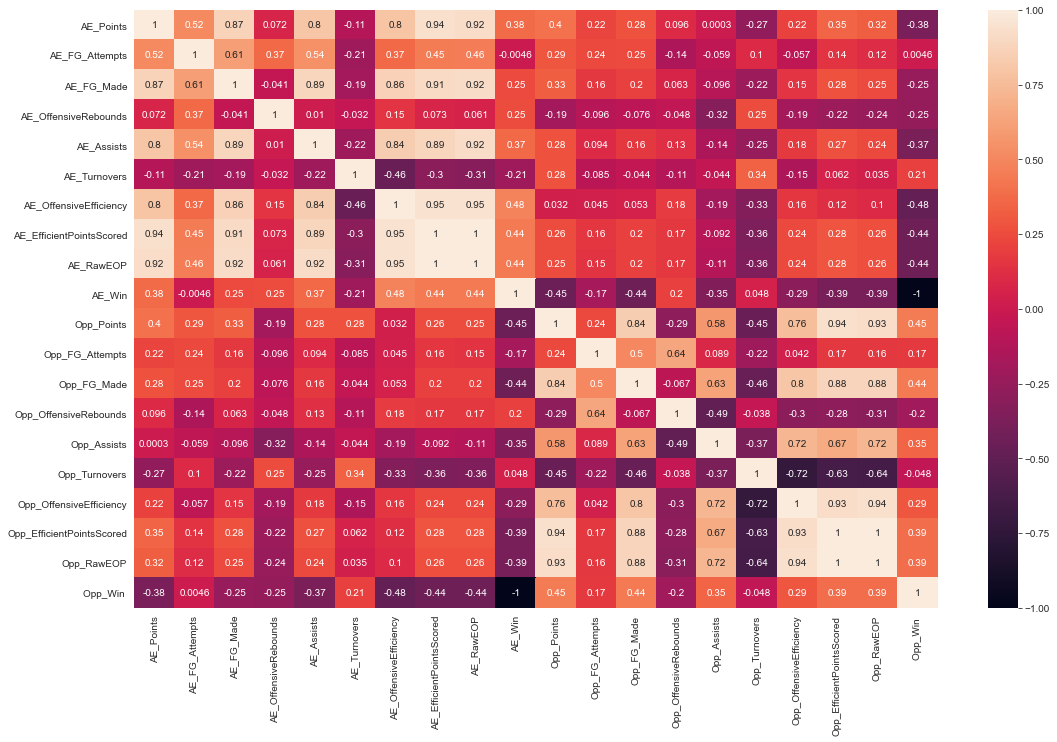

In [270]:
#Appleton East FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(appleton_east_game.corr(), annot = True);

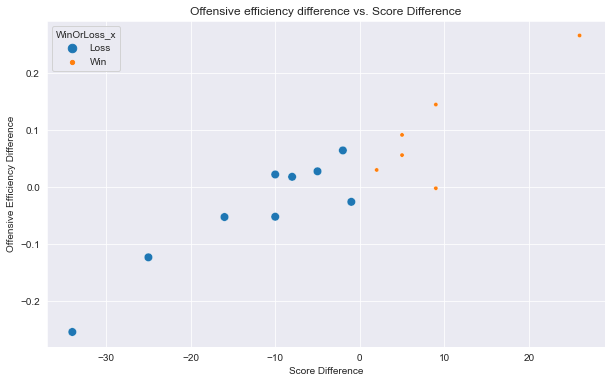

In [271]:
appleton_east_game['ScoreDifference'] = appleton_east_game['AE_Points'] - appleton_east_game['Opp_Points']
appleton_east_game['OffensiveEfficiencyDifference'] = appleton_east_game['AE_OffensiveEfficiency'] - appleton_east_game['Opp_OffensiveEfficiency']
appleton_east_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = appleton_east_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [272]:
# Appleton North offense correlations
appleton_north_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.773785        0.882375   
FieldGoalAttempts          0.773785           1.000000        0.837662   
FieldGoalsMade             0.882375           0.837662        1.000000   
OffensiveRebounds          0.393289           0.622827        0.356633   
Assists                    0.416986           0.489491        0.421098   
Turnovers                  0.217960           0.027365        0.131750   
OffensiveEfficiency        0.504891           0.447361        0.627161   
EfficientPointsScored      0.931985           0.758025        0.910120   
RawEOP                     0.911837           0.754394        0.885555   
Loss                      -0.518174          -0.243865       -0.423414   
Win                        0.518174           0.243865        0.423414   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.393289  0.416986   0.217960   
FieldGoalAttempts               0.622827  0.489491   0.027365   
FieldGoalsMade                  0.356633  0.421098   0.131750   
OffensiveRebounds               1.000000  0.384219   0.106736   
Assists                         0.384219  1.000000   0.106772   
Turnovers                       0.106736  0.106772   1.000000   
OffensiveEfficiency             0.265170  0.559546  -0.445183   
EfficientPointsScored           0.409107  0.523738  -0.029185   
RawEOP                          0.429842  0.623729  -0.018931   
Loss                           -0.201461  0.023841  -0.112626   
Win                             0.201461 -0.023841   0.112626   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.504891               0.931985  0.911837   
FieldGoalAttempts                 0.447361               0.758025  0.754394   
FieldGoalsMade                    0.627161               0.910120  0.885555   
OffensiveRebounds                 0.265170               0.409107  0.429842   
Assists                           0.559546               0.523738  0.623729   
Turnovers                        -0.445183              -0.029185 -0.018931   
OffensiveEfficiency               1.000000               0.777559  0.797738   
EfficientPointsScored             0.777559               1.000000  0.990961   
RawEOP                            0.797738               0.990961  1.000000   
Loss                             -0.269439              -0.485336 -0.451849   
Win                               0.269439               0.485336  0.451849   

                           Loss       Win  
PointsScored          -0.518174  0.518174  
FieldGoalAttempts     -0.243865  0.243865  
FieldGoalsMade        -0.423414  0.423414  
OffensiveRebounds     -0.201461  0.201461  
Assists                0.023841 -0.023841  
Turnovers             -0.112626  0.112626  
OffensiveEfficiency   -0.269439  0.269439  
EfficientPointsScored -0.485336  0.485336  
RawEOP                -0.451849  0.451849  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [273]:
# Appleton North offense compared in wins and losses 
appleton_north_win = appleton_north_num[appleton_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_north_loss = appleton_north_num[appleton_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_north_offense = pd.concat(frames)
appleton_north_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         13.000000          13.000000            13.0   
Averages in Wins       63.153846          48.538462            22.0   
Number of Losses       10.000000          10.000000            10.0   
Averages in Losses     52.000000          45.000000            18.0   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins              13.000000  13.000000  13.000000   
Averages in Wins             7.384615  12.538462  13.153846   
Number of Losses            10.000000  10.000000  10.000000   
Averages in Losses           6.300000  12.700000  12.100000   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                13.000000              13.000000  13.000000  
Averages in Wins               0.514380              32.800102  37.926700  
Number of Losses              10.000000              10.000000  10.000000  
Averages in Losses             0.482649              25.211629  29.811322

In [274]:
# Appleton North opponent's offense correlations
appleton_north_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.309990        0.904055   
FieldGoalAttempts          0.309990           1.000000        0.390763   
FieldGoalsMade             0.904055           0.390763        1.000000   
OffensiveRebounds          0.149827           0.794325        0.099651   
Assists                    0.587471           0.262610        0.817700   
Turnovers                 -0.207910          -0.305470       -0.374251   
OffensiveEfficiency        0.783718           0.088434        0.919810   
EfficientPointsScored      0.938132           0.265219        0.973292   
RawEOP                     0.918865           0.273684        0.980125   
Loss                      -0.498535           0.099211       -0.515304   
Win                        0.498535          -0.099211        0.515304   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.149827  0.587471  -0.207910   
FieldGoalAttempts               0.794325  0.262610  -0.305470   
FieldGoalsMade                  0.099651  0.817700  -0.374251   
OffensiveRebounds               1.000000 -0.155948  -0.091023   
Assists                        -0.155948  1.000000  -0.234423   
Turnovers                      -0.091023 -0.234423   1.000000   
OffensiveEfficiency            -0.168528  0.813633  -0.486550   
EfficientPointsScored           0.049007  0.743075  -0.388347   
RawEOP                          0.030091  0.789399  -0.388130   
Loss                            0.264419 -0.461318   0.625364   
Win                            -0.264419  0.461318  -0.625364   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.783718               0.938132  0.918865   
FieldGoalAttempts                 0.088434               0.265219  0.273684   
FieldGoalsMade                    0.919810               0.973292  0.980125   
OffensiveRebounds                -0.168528               0.049007  0.030091   
Assists                           0.813633               0.743075  0.789399   
Turnovers                        -0.486550              -0.388347 -0.388130   
OffensiveEfficiency               1.000000               0.932178  0.942240   
EfficientPointsScored             0.932178               1.000000  0.996858   
RawEOP                            0.942240               0.996858  1.000000   
Loss                             -0.697020              -0.597038 -0.595849   
Win                               0.697020               0.597038  0.595849   

                           Loss       Win  
PointsScored          -0.498535  0.498535  
FieldGoalAttempts      0.099211 -0.099211  
FieldGoalsMade        -0.515304  0.515304  
OffensiveRebounds      0.264419 -0.264419  
Assists               -0.461318  0.461318  
Turnovers              0.625364 -0.625364  
OffensiveEfficiency   -0.697020  0.697020  
EfficientPointsScored -0.597038  0.597038  
RawEOP                -0.595849  0.595849  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [275]:
# Appleton North opponent's offense compared in wins and losses 
appleton_north_win_opp = appleton_north_opp_num[appleton_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_north_loss_opp = appleton_north_opp_num[appleton_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_north_opponent = pd.concat(frames)
appleton_north_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins               5.0               5.00           5.000   
Averages in Wins            53.0              53.40          18.000   
Number of Losses             8.0               8.00           8.000   
Averages in Losses          67.5              51.75          24.375   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins                  5.000     5.00       5.00   
Averages in Wins                9.800    11.40      15.20   
Number of Losses                8.000     8.00       8.00   
Averages in Losses              7.875    15.25       9.75   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 5.000000               5.000000   5.000000  
Averages in Wins               0.414030              22.893164  26.624034  
Number of Losses               8.000000               8.000000   8.000000  
Averages in Losses             0.570617              39.019413  45.606616

In [276]:
#FVA Appleton North games
game = [appleton_north, appleton_north_opp]
appleton_north_game = pd.concat(game)
appleton_north_game = pd.merge(left = appleton_north, right = appleton_north_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
appleton_north_game = appleton_north_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
appleton_north_game = appleton_north_game.rename(columns = {'PointsScored_x': 'AN_Points', 'FieldGoalAttempts_x': 'AN_FG_Attempts', 'FieldGoalsMade_x': 'AN_FG_Made', 'OffensiveRebounds_x': 'AN_OffensiveRebounds' , 'Assists_x': 'AN_Assists', 'Turnovers_x': 'AN_Turnovers', 'OffensiveEfficiency_x': 'AN_OffensiveEfficiency', 'EfficientPointsScored_x': 'AN_EfficientPointsScored', 'RawEOP_x': 'AN_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'AN_Win', 'Win_y' : 'Opp_Win '})

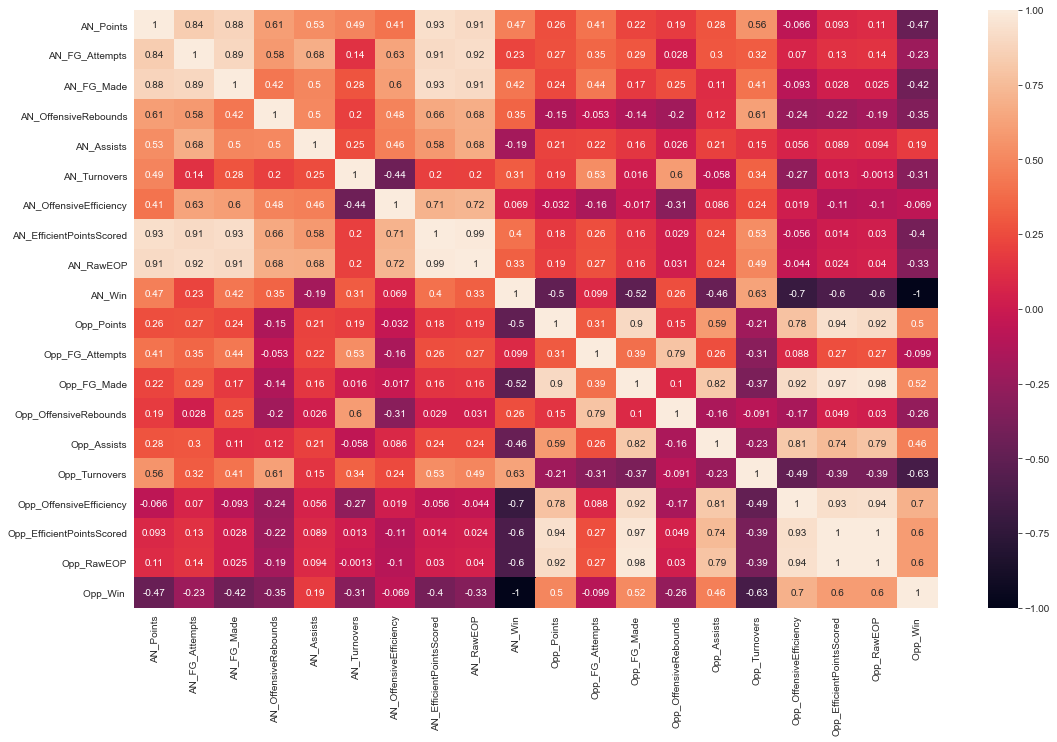

In [277]:
#Appleton North FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(appleton_north_game.corr(), annot = True);

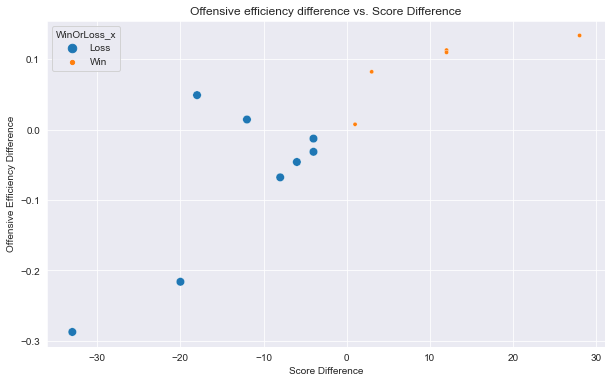

In [278]:
appleton_north_game['ScoreDifference'] = appleton_north_game['AN_Points'] - appleton_north_game['Opp_Points']
appleton_north_game['OffensiveEfficiencyDifference'] = appleton_north_game['AN_OffensiveEfficiency'] - appleton_north_game['Opp_OffensiveEfficiency']
appleton_north_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = appleton_north_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [279]:
# Appleton West offense correlations
appleton_west_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.337162        0.913460   
FieldGoalAttempts          0.337162           1.000000        0.482070   
FieldGoalsMade             0.913460           0.482070        1.000000   
OffensiveRebounds         -0.066431           0.410106        0.121322   
Assists                    0.384656           0.599854        0.427805   
Turnovers                 -0.029284          -0.258856       -0.067503   
OffensiveEfficiency        0.788518           0.377985        0.868898   
EfficientPointsScored      0.926536           0.362003        0.921490   
RawEOP                     0.881722           0.402723        0.885511   
Loss                      -0.488768          -0.150866       -0.346566   
Win                        0.488768           0.150866        0.346566   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.066431  0.384656  -0.029284   
FieldGoalAttempts               0.410106  0.599854  -0.258856   
FieldGoalsMade                  0.121322  0.427805  -0.067503   
OffensiveRebounds               1.000000  0.217874  -0.081301   
Assists                         0.217874  1.000000  -0.056951   
Turnovers                      -0.081301 -0.056951   1.000000   
OffensiveEfficiency             0.288064  0.577130  -0.302348   
EfficientPointsScored           0.150492  0.530634  -0.196722   
RawEOP                          0.178837  0.651268  -0.198075   
Loss                           -0.341715 -0.341587   0.233415   
Win                             0.341715  0.341587  -0.233415   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.788518               0.926536  0.881722   
FieldGoalAttempts                 0.377985               0.362003  0.402723   
FieldGoalsMade                    0.868898               0.921490  0.885511   
OffensiveRebounds                 0.288064               0.150492  0.178837   
Assists                           0.577130               0.530634  0.651268   
Turnovers                        -0.302348              -0.196722 -0.198075   
OffensiveEfficiency               1.000000               0.955816  0.959698   
EfficientPointsScored             0.955816               1.000000  0.985363   
RawEOP                            0.959698               0.985363  1.000000   
Loss                             -0.550783              -0.590921 -0.583410   
Win                               0.550783               0.590921  0.583410   

                           Loss       Win  
PointsScored          -0.488768  0.488768  
FieldGoalAttempts     -0.150866  0.150866  
FieldGoalsMade        -0.346566  0.346566  
OffensiveRebounds     -0.341715  0.341715  
Assists               -0.341587  0.341587  
Turnovers              0.233415 -0.233415  
OffensiveEfficiency   -0.550783  0.550783  
EfficientPointsScored -0.590921  0.590921  
RawEOP                -0.583410  0.583410  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [280]:
# Appleton West Offense compared in wins and losses 
appleton_west_win = appleton_west_num[appleton_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_west_loss = appleton_west_num[appleton_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_west_offense = pd.concat(frames)
appleton_west_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins            3.0000           3.000000          3.0000   
Averages in Wins         63.0000          54.666667         23.0000   
Number of Losses         16.0000          16.000000         16.0000   
Averages in Losses       51.3125          52.062500         19.0625   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins               3.000000      3.0   3.000000   
Averages in Wins            12.333333     13.0  12.666667   
Number of Losses            16.000000     16.0  16.000000   
Averages in Losses           9.250000      9.0  15.437500   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 3.000000               3.000000   3.000000  
Averages in Wins               0.527543              33.279186  38.017709  
Number of Losses              16.000000              16.000000  16.000000  
Averages in Losses             0.414419              21.659318  24.725215

In [281]:
# Appleton West opponent's offense correlations
appleton_west_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.645622        0.941979   
FieldGoalAttempts          0.645622           1.000000        0.683724   
FieldGoalsMade             0.941979           0.683724        1.000000   
OffensiveRebounds          0.241282           0.677646        0.264245   
Assists                    0.653169           0.497381        0.708447   
Turnovers                 -0.446461          -0.124316       -0.435743   
OffensiveEfficiency        0.827186           0.415885        0.879643   
EfficientPointsScored      0.965087           0.552016        0.949188   
RawEOP                     0.943148           0.552630        0.942541   
Loss                            NaN                NaN             NaN   
Win                             NaN                NaN             NaN   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.241282  0.653169  -0.446461   
FieldGoalAttempts               0.677646  0.497381  -0.124316   
FieldGoalsMade                  0.264245  0.708447  -0.435743   
OffensiveRebounds               1.000000  0.106861   0.124326   
Assists                         0.106861  1.000000  -0.330877   
Turnovers                       0.124326 -0.330877   1.000000   
OffensiveEfficiency             0.202599  0.753756  -0.596672   
EfficientPointsScored           0.222016  0.722498  -0.553653   
RawEOP                          0.203933  0.803982  -0.547675   
Loss                                 NaN       NaN        NaN   
Win                                  NaN       NaN        NaN   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.827186               0.965087  0.943148   
FieldGoalAttempts                 0.415885               0.552016  0.552630   
FieldGoalsMade                    0.879643               0.949188  0.942541   
OffensiveRebounds                 0.202599               0.222016  0.203933   
Assists                           0.753756               0.722498  0.803982   
Turnovers                        -0.596672              -0.553653 -0.547675   
OffensiveEfficiency               1.000000               0.932712  0.944102   
EfficientPointsScored             0.932712               1.000000  0.991627   
RawEOP                            0.944102               0.991627  1.000000   
Loss                                   NaN                    NaN       NaN   
Win                                    NaN                    NaN       NaN   

                       Loss  Win  
PointsScored            NaN  NaN  
FieldGoalAttempts       NaN  NaN  
FieldGoalsMade          NaN  NaN  
OffensiveRebounds       NaN  NaN  
Assists                 NaN  NaN  
Turnovers               NaN  NaN  
OffensiveEfficiency     NaN  NaN  
EfficientPointsScored   NaN  NaN  
RawEOP                  NaN  NaN  
Loss                    NaN  NaN  
Win                     NaN  NaN

In [282]:
# Appleton West opponent's offense compared in wins and losses 
appleton_west_win_opp = appleton_west_opp_num[appleton_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_west_loss_opp = appleton_west_opp_num[appleton_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_west_opponent = pd.concat(frames)
appleton_west_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins            0.0000             0.0000          0.0000   
Averages in Wins             NaN                NaN             NaN   
Number of Losses         16.0000            16.0000         16.0000   
Averages in Losses       78.3125            57.1875         28.3125   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins                 0.0000    0.000     0.0000   
Averages in Wins                  NaN      NaN        NaN   
Number of Losses              16.0000   16.000    16.0000   
Averages in Losses            11.6875   18.625    11.3125   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 0.000000               0.000000   0.000000  
Averages in Wins                    NaN                    NaN        NaN  
Number of Losses              16.000000              16.000000  16.000000  
Averages in Losses             0.615535              49.225385  58.263812

In [283]:
#FVA Appleton West games 
game = [appleton_west, appleton_west_opp]
appleton_west_game = pd.concat(game)
appleton_west_game
appleton_west_game = pd.merge(left = appleton_west, right = appleton_west_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
appleton_west_game = appleton_west_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
appleton_west_game = appleton_west_game.rename(columns = {'PointsScored_x': 'AW_Points', 'FieldGoalAttempts_x': 'AW_FG_Attempts', 'FieldGoalsMade_x': 'AW_FG_Made', 'OffensiveRebounds_x': 'AW_OffensiveRebounds' , 'Assists_x': 'AW_Assists', 'Turnovers_x': 'AW_Turnovers', 'OffensiveEfficiency_x': 'AW_OffensiveEfficiency', 'EfficientPointsScored_x': 'AW_EfficientPointsScored', 'RawEOP_x': 'AW_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'AW_Win', 'Win_y' : 'Opp_Win '})

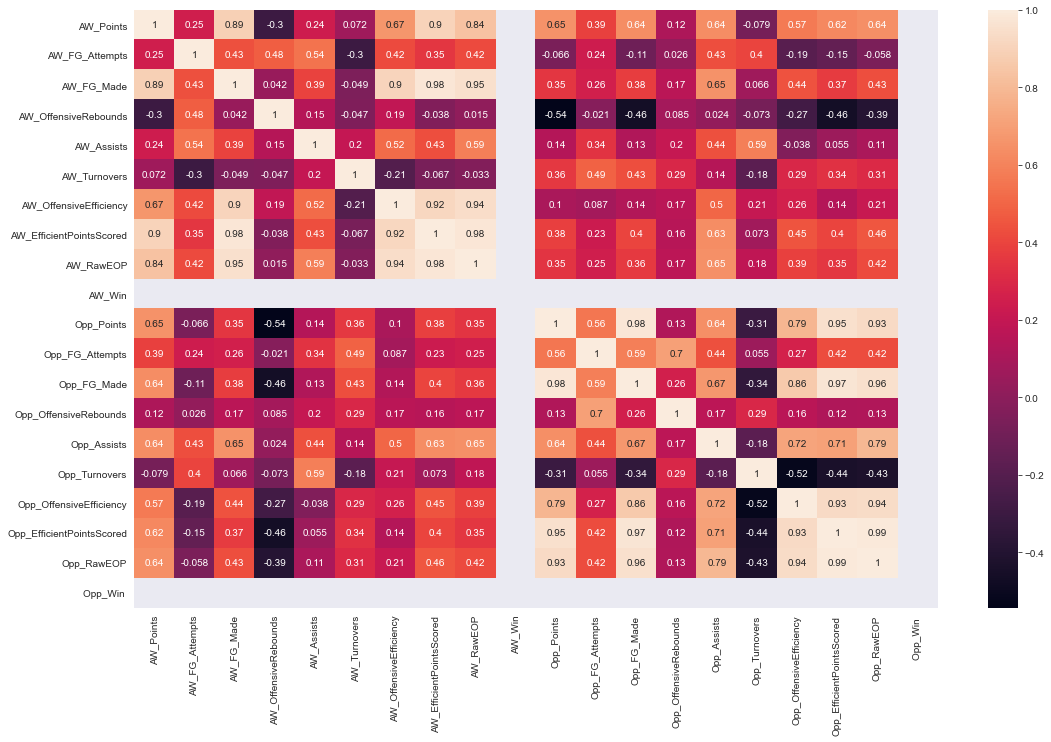

In [284]:
plt.figure(figsize= (18,11))
sns.heatmap(appleton_west_game.corr(), annot = True);

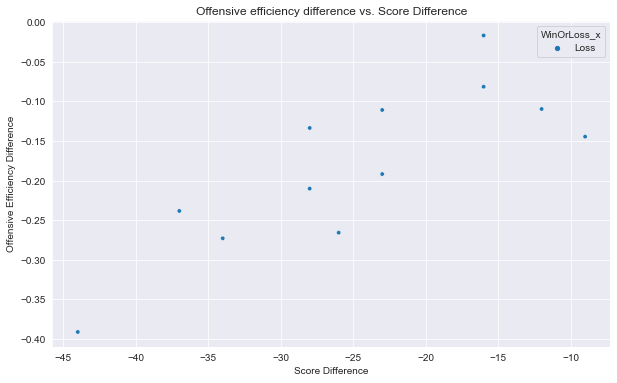

In [285]:
appleton_west_game['ScoreDifference'] = appleton_west_game['AW_Points'] - appleton_west_game['Opp_Points']
appleton_west_game['OffensiveEfficiencyDifference'] = appleton_west_game['AW_OffensiveEfficiency'] - appleton_west_game['Opp_OffensiveEfficiency']
appleton_west_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = appleton_west_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [286]:
# Fond du Lac offense correlations
fond_du_lac_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.294593        0.780258   
FieldGoalAttempts          0.294593           1.000000        0.509457   
FieldGoalsMade             0.780258           0.509457        1.000000   
OffensiveRebounds         -0.026105           0.438777       -0.137370   
Assists                    0.555806           0.145395        0.646653   
Turnovers                 -0.193070           0.059592       -0.170039   
OffensiveEfficiency        0.664453          -0.114483        0.651852   
EfficientPointsScored      0.913834           0.089529        0.781672   
RawEOP                     0.895267           0.092832        0.791044   
Loss                      -0.406581           0.147913       -0.334630   
Win                        0.406581          -0.147913        0.334630   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.026105  0.555806  -0.193070   
FieldGoalAttempts               0.438777  0.145395   0.059592   
FieldGoalsMade                 -0.137370  0.646653  -0.170039   
OffensiveRebounds               1.000000 -0.176490   0.355361   
Assists                        -0.176490  1.000000  -0.192067   
Turnovers                       0.355361 -0.192067   1.000000   
OffensiveEfficiency            -0.232504  0.767324  -0.534336   
EfficientPointsScored          -0.148394  0.716708  -0.397520   
RawEOP                         -0.150180  0.741929  -0.381248   
Loss                            0.061646 -0.491253  -0.135877   
Win                            -0.061646  0.491253   0.135877   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.664453               0.913834  0.895267   
FieldGoalAttempts                -0.114483               0.089529  0.092832   
FieldGoalsMade                    0.651852               0.781672  0.791044   
OffensiveRebounds                -0.232504              -0.148394 -0.150180   
Assists                           0.767324               0.716708  0.741929   
Turnovers                        -0.534336              -0.397520 -0.381248   
OffensiveEfficiency               1.000000               0.907663  0.918427   
EfficientPointsScored             0.907663               1.000000  0.993981   
RawEOP                            0.918427               0.993981  1.000000   
Loss                             -0.459384              -0.466290 -0.478688   
Win                               0.459384               0.466290  0.478688   

                           Loss       Win  
PointsScored          -0.406581  0.406581  
FieldGoalAttempts      0.147913 -0.147913  
FieldGoalsMade        -0.334630  0.334630  
OffensiveRebounds      0.061646 -0.061646  
Assists               -0.491253  0.491253  
Turnovers             -0.135877  0.135877  
OffensiveEfficiency   -0.459384  0.459384  
EfficientPointsScored -0.466290  0.466290  
RawEOP                -0.478688  0.478688  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [287]:
# Fond du Lac offense compared in wins and losses 
fond_du_lac_win = fond_du_lac_num[fond_du_lac_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = fond_du_lac_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fond_du_lac_loss = fond_du_lac_num[fond_du_lac_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
fond_du_lac_offense = pd.concat(frames)
fond_du_lac_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         16.000000          16.000000       16.000000   
Averages in Wins       70.437500          47.500000       23.625000   
Number of Losses        7.000000           7.000000        7.000000   
Averages in Losses     61.285714          49.714286       20.714286   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins              16.000000  16.0000  16.000000   
Averages in Wins             5.437500  14.1875  11.375000   
Number of Losses             7.000000   7.0000   7.000000   
Averages in Losses           5.857143  10.0000  10.285714   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                16.000000              16.000000  16.000000  
Averages in Wins               0.558086              39.799397  45.379145  
Number of Losses               7.000000               7.000000   7.000000  
Averages in Losses             0.480440              29.590154  33.301037

In [288]:
# Fond du Lac opponent's offense correlations
fond_du_lac_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.481794        0.962549   
FieldGoalAttempts          0.481794           1.000000        0.511921   
FieldGoalsMade             0.962549           0.511921        1.000000   
OffensiveRebounds         -0.176666           0.486027       -0.162660   
Assists                    0.693185           0.372949        0.759862   
Turnovers                  0.010424          -0.163288       -0.122594   
OffensiveEfficiency        0.730382           0.178802        0.805820   
EfficientPointsScored      0.938821           0.382664        0.958742   
RawEOP                     0.923076           0.400479        0.947185   
Loss                      -0.447060          -0.127126       -0.475223   
Win                        0.447060           0.127126        0.475223   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.176666  0.693185   0.010424   
FieldGoalAttempts               0.486027  0.372949  -0.163288   
FieldGoalsMade                 -0.162660  0.759862  -0.122594   
OffensiveRebounds               1.000000 -0.060352  -0.139511   
Assists                        -0.060352  1.000000  -0.396811   
Turnovers                      -0.139511 -0.396811   1.000000   
OffensiveEfficiency            -0.084879  0.847251  -0.464830   
EfficientPointsScored          -0.161161  0.831236  -0.261000   
RawEOP                         -0.127588  0.869633  -0.287292   
Loss                           -0.012482 -0.398756   0.187317   
Win                             0.012482  0.398756  -0.187317   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.730382               0.938821  0.923076   
FieldGoalAttempts                 0.178802               0.382664  0.400479   
FieldGoalsMade                    0.805820               0.958742  0.947185   
OffensiveRebounds                -0.084879              -0.161161 -0.127588   
Assists                           0.847251               0.831236  0.869633   
Turnovers                        -0.464830              -0.261000 -0.287292   
OffensiveEfficiency               1.000000               0.902307  0.907438   
EfficientPointsScored             0.902307               1.000000  0.995374   
RawEOP                            0.907438               0.995374  1.000000   
Loss                             -0.550048              -0.523724 -0.508693   
Win                               0.550048               0.523724  0.508693   

                           Loss       Win  
PointsScored          -0.447060  0.447060  
FieldGoalAttempts     -0.127126  0.127126  
FieldGoalsMade        -0.475223  0.475223  
OffensiveRebounds     -0.012482  0.012482  
Assists               -0.398756  0.398756  
Turnovers              0.187317 -0.187317  
OffensiveEfficiency   -0.550048  0.550048  
EfficientPointsScored -0.523724  0.523724  
RawEOP                -0.508693  0.508693  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [289]:
# Fond du Lac oppononet's offense compared in wins and losses 
fond_du_lac_win_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
fond_du_lac_loss_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = fond_du_lac_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
fond_du_lac_opponent = pd.concat(frames)
fond_du_lac_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         12.000000          12.000000       12.000000   
Averages in Wins       62.333333          52.083333       23.333333   
Number of Losses        6.000000           6.000000        6.000000   
Averages in Losses     75.500000          53.833333       29.666667   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins              12.000000     12.0  12.000000   
Averages in Wins             7.583333     12.5  10.666667   
Number of Losses             6.000000      6.0   6.000000   
Averages in Losses           7.666667     16.5   9.166667   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                12.000000              12.000000  12.000000  
Averages in Wins               0.525099              33.326840  38.379177  
Number of Losses               6.000000               6.000000   6.000000  
Averages in Losses             0.640368              49.149868  56.780228

In [290]:
#FVA Fond du Lac games 
game = [fond_du_lac, fond_du_lac_opp]
fond_du_lac_game = pd.concat(game)
fond_du_lac_game
fond_du_lac_game = pd.merge(left = fond_du_lac, right = fond_du_lac_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
fond_du_lac_game = fond_du_lac_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
fond_du_lac_game = fond_du_lac_game.rename(columns = {'PointsScored_x': 'Fondy_Points', 'FieldGoalAttempts_x': 'Fondy_FG_Attempts', 'FieldGoalsMade_x': 'Fondy_FG_Made', 'OffensiveRebounds_x': 'Fondy_OffensiveRebounds' , 'Assists_x': 'Fondy_Assists', 'Turnovers_x': 'Fondy_Turnovers', 'OffensiveEfficiency_x': 'Fondy_OffensiveEfficiency', 'EfficientPointsScored_x': 'Fondy_EfficientPointsScored', 'RawEOP_x': 'Fondy_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'Fondy_Win', 'Win_y' : 'Opp_Win '})

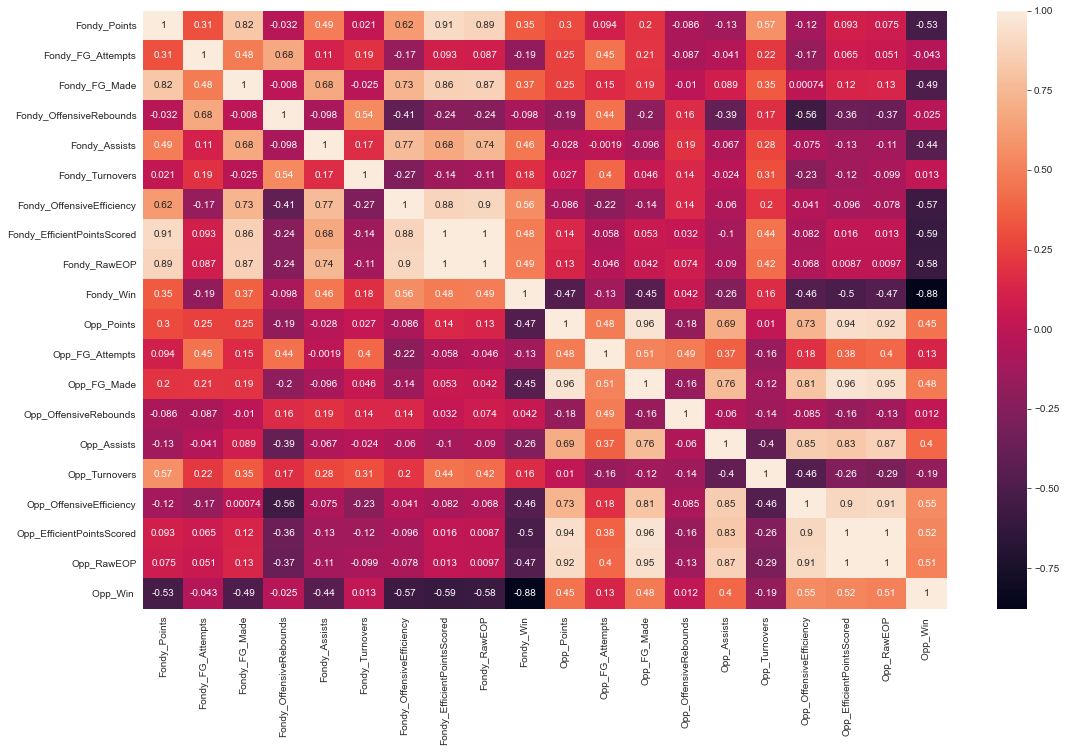

In [291]:
plt.figure(figsize= (18,11))
sns.heatmap(fond_du_lac_game.corr(), annot = True);

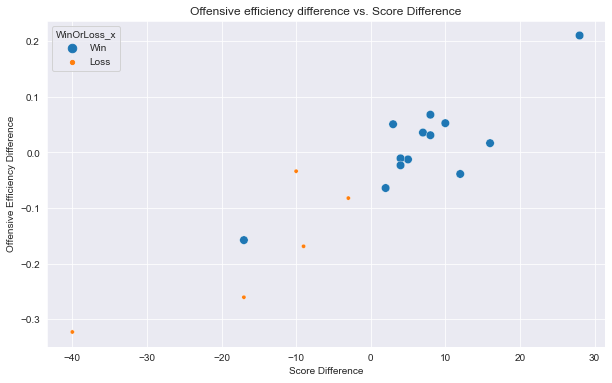

In [292]:
fond_du_lac_game['ScoreDifference'] = fond_du_lac_game['Fondy_Points'] - fond_du_lac_game['Opp_Points']
fond_du_lac_game['OffensiveEfficiencyDifference'] = fond_du_lac_game['Fondy_OffensiveEfficiency'] - fond_du_lac_game['Opp_OffensiveEfficiency']
fond_du_lac_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = fond_du_lac_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [293]:
# Hortonville offense correlations
hortonville_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.500415        0.837258   
FieldGoalAttempts          0.500415           1.000000        0.508571   
FieldGoalsMade             0.837258           0.508571        1.000000   
OffensiveRebounds          0.479299           0.767857        0.313946   
Assists                    0.238986           0.196579        0.354636   
Turnovers                 -0.091795          -0.277459       -0.090811   
OffensiveEfficiency        0.678387           0.122199        0.805151   
EfficientPointsScored      0.939731           0.357220        0.886789   
RawEOP                     0.896997           0.350878        0.880213   
Loss                      -0.705486          -0.637156       -0.486710   
Win                        0.705486           0.637156        0.486710   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.479299  0.238986  -0.091795   
FieldGoalAttempts               0.767857  0.196579  -0.277459   
FieldGoalsMade                  0.313946  0.354636  -0.090811   
OffensiveRebounds               1.000000  0.075615  -0.094564   
Assists                         0.075615  1.000000   0.113266   
Turnovers                      -0.094564  0.113266   1.000000   
OffensiveEfficiency             0.113347  0.534314  -0.237647   
EfficientPointsScored           0.344371  0.375990  -0.186237   
RawEOP                          0.312746  0.526309  -0.160707   
Loss                           -0.650265 -0.177695   0.315399   
Win                             0.650265  0.177695  -0.315399   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.678387               0.939731  0.896997   
FieldGoalAttempts                 0.122199               0.357220  0.350878   
FieldGoalsMade                    0.805151               0.886789  0.880213   
OffensiveRebounds                 0.113347               0.344371  0.312746   
Assists                           0.534314               0.375990  0.526309   
Turnovers                        -0.237647              -0.186237 -0.160707   
OffensiveEfficiency               1.000000               0.880849  0.914741   
EfficientPointsScored             0.880849               1.000000  0.985281   
RawEOP                            0.914741               0.985281  1.000000   
Loss                             -0.373820              -0.608775 -0.579420   
Win                               0.373820               0.608775  0.579420   

                           Loss       Win  
PointsScored          -0.705486  0.705486  
FieldGoalAttempts     -0.637156  0.637156  
FieldGoalsMade        -0.486710  0.486710  
OffensiveRebounds     -0.650265  0.650265  
Assists               -0.177695  0.177695  
Turnovers              0.315399 -0.315399  
OffensiveEfficiency   -0.373820  0.373820  
EfficientPointsScored -0.608775  0.608775  
RawEOP                -0.579420  0.579420  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [294]:
# Hortonville offense compared in wins and losses 
hortonville_win = hortonville_num[hortonville_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = hortonville_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
hortonville_loss = hortonville_num[hortonville_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
hortonville_offense = pd.concat(frames)
hortonville_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          7.000000           7.000000        7.000000   
Averages in Wins       73.142857          62.285714       26.857143   
Number of Losses       11.000000          11.000000       11.000000   
Averages in Losses     59.818182          52.909091       22.727273   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               7.000000   7.000000   7.000000   
Averages in Wins            13.571429  14.571429  13.285714   
Number of Losses            11.000000  11.000000  11.000000   
Averages in Losses           9.272727  13.181818  15.454545   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 7.000000               7.000000   7.000000  
Averages in Wins               0.543079              39.839613  45.837185  
Number of Losses              11.000000              11.000000  11.000000  
Averages in Losses             0.494083              29.879713  34.981855

In [295]:
# Hortonville opponent's offense correlations
hortonville_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.576386        0.946559   
FieldGoalAttempts          0.576386           1.000000        0.661930   
FieldGoalsMade             0.946559           0.661930        1.000000   
OffensiveRebounds          0.428812           0.800387        0.517023   
Assists                    0.850642           0.708125        0.879720   
Turnovers                 -0.538462          -0.253416       -0.425487   
OffensiveEfficiency        0.868272           0.384731        0.854207   
EfficientPointsScored      0.968306           0.555232        0.941131   
RawEOP                     0.951530           0.549433        0.927990   
Loss                      -0.584851           0.003879       -0.377964   
Win                        0.584851          -0.003879        0.377964   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.428812  0.850642  -0.538462   
FieldGoalAttempts               0.800387  0.708125  -0.253416   
FieldGoalsMade                  0.517023  0.879720  -0.425487   
OffensiveRebounds               1.000000  0.644080  -0.122806   
Assists                         0.644080  1.000000  -0.575336   
Turnovers                      -0.122806 -0.575336   1.000000   
OffensiveEfficiency             0.409995  0.875745  -0.703890   
EfficientPointsScored           0.489969  0.915488  -0.632434   
RawEOP                          0.503160  0.926486  -0.623918   
Loss                           -0.110405 -0.352167   0.418002   
Win                             0.110405  0.352167  -0.418002   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.868272               0.968306  0.951530   
FieldGoalAttempts                 0.384731               0.555232  0.549433   
FieldGoalsMade                    0.854207               0.941131  0.927990   
OffensiveRebounds                 0.409995               0.489969  0.503160   
Assists                           0.875745               0.915488  0.926486   
Turnovers                        -0.703890              -0.632434 -0.623918   
OffensiveEfficiency               1.000000               0.953609  0.952563   
EfficientPointsScored             0.953609               1.000000  0.994681   
RawEOP                            0.952563               0.994681  1.000000   
Loss                             -0.546177              -0.564772 -0.533701   
Win                               0.546177               0.564772  0.533701   

                           Loss       Win  
PointsScored          -0.584851  0.584851  
FieldGoalAttempts      0.003879 -0.003879  
FieldGoalsMade        -0.377964  0.377964  
OffensiveRebounds     -0.110405  0.110405  
Assists               -0.352167  0.352167  
Turnovers              0.418002 -0.418002  
OffensiveEfficiency   -0.546177  0.546177  
EfficientPointsScored -0.564772  0.564772  
RawEOP                -0.533701  0.533701  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [296]:
# Hortonville oppononet's offense compared in wins and losses 
hortonville_win_opp = hortonville_opp_num[hortonville_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
hortonville_loss_opp = hortonville_opp_num[hortonville_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = hortonville_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
hortonville_opponent = pd.concat(frames)
hortonville_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins               7.0           7.000000        7.000000   
Averages in Wins            60.0          53.285714       21.857143   
Number of Losses             9.0           9.000000        9.000000   
Averages in Losses          73.0          53.222222       25.666667   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               7.000000   7.000000   7.000000   
Averages in Wins             9.714286  14.428571  17.714286   
Number of Losses             9.000000   9.000000   9.000000   
Averages in Losses          10.666667  17.555556  13.555556   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 7.000000               7.000000   7.000000  
Averages in Wins               0.481844              29.177180  34.517965  
Number of Losses               9.000000               9.000000   9.000000  
Averages in Losses             0.579700              43.067019  50.479275

In [297]:
#FVA Hortonville games 
game = [hortonville, hortonville_opp]
hortonville_game = pd.concat(game)
hortonville_game
hortonville_game = pd.merge(left = hortonville, right = hortonville_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
hortonville_game = hortonville_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
hortonville_game = hortonville_game.rename(columns = {'PointsScored_x': 'Hort_Points', 'FieldGoalAttempts_x': 'Hort_FG_Attempts', 'FieldGoalsMade_x': 'Hort_FG_Made', 'OffensiveRebounds_x': 'Hort_OffensiveRebounds' , 'Assists_x': 'Hort_Assists', 'Turnovers_x': 'Hort_Turnovers', 'OffensiveEfficiency_x': 'Hort_OffensiveEfficiency', 'EfficientPointsScored_x': 'Hort_EfficientPointsScored', 'RawEOP_x': 'Hort_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'Hort_Win', 'Win_y' : 'Opp_Win '})

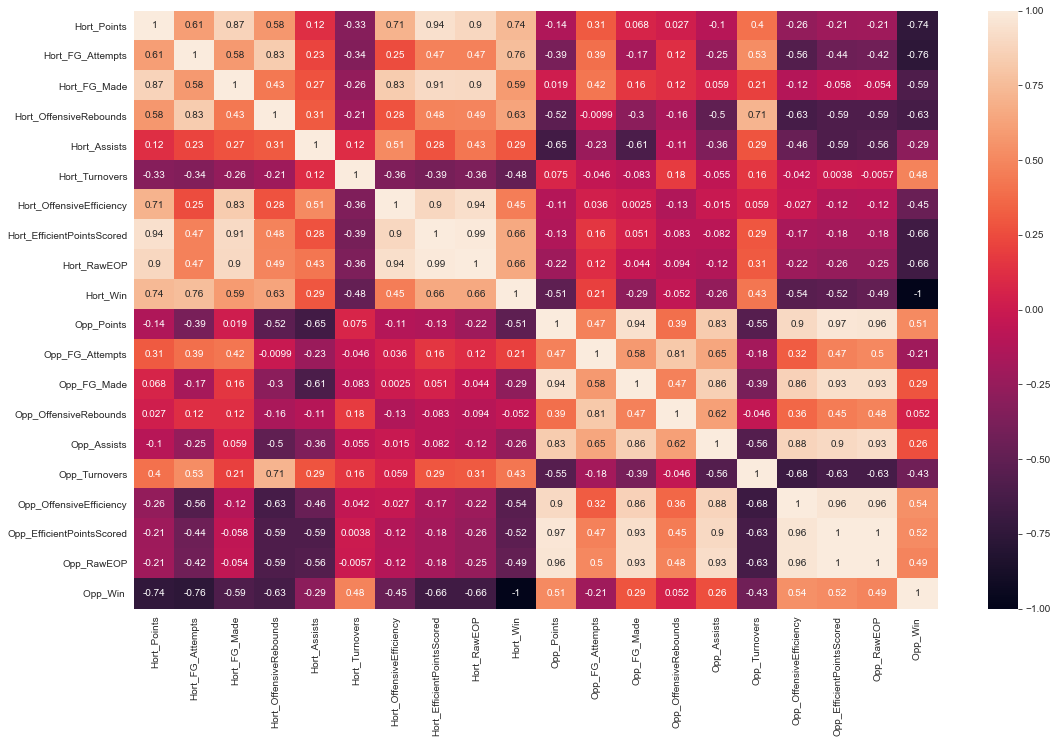

In [298]:
plt.figure(figsize=(18,11))
sns.heatmap(hortonville_game.corr(), annot = True);

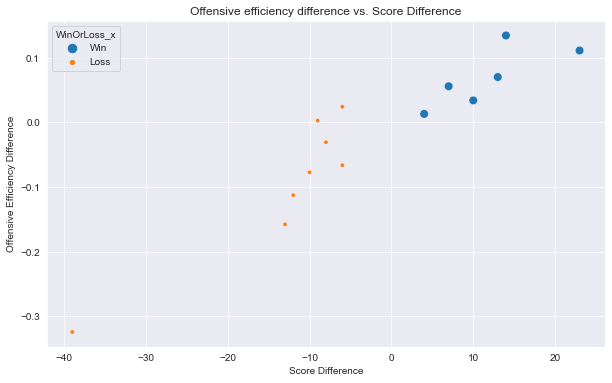

In [299]:
hortonville_game['ScoreDifference'] = hortonville_game['Hort_Points'] - hortonville_game['Opp_Points']
hortonville_game['OffensiveEfficiencyDifference'] = hortonville_game['Hort_OffensiveEfficiency'] - hortonville_game['Opp_OffensiveEfficiency']
hortonville_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = hortonville_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [300]:
# Kaukauna offense correlations
kaukauna_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.587783        0.946128   
FieldGoalAttempts          0.587783           1.000000        0.587221   
FieldGoalsMade             0.946128           0.587221        1.000000   
OffensiveRebounds          0.526239           0.477172        0.551278   
Assists                    0.790082           0.568219        0.822968   
Turnovers                 -0.088201          -0.304320       -0.083087   
OffensiveEfficiency        0.851272           0.358529        0.914396   
EfficientPointsScored      0.958475           0.514559        0.963606   
RawEOP                     0.944204           0.523919        0.957542   
Loss                      -0.517894          -0.077475       -0.393645   
Win                        0.517894           0.077475        0.393645   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.526239  0.790082  -0.088201   
FieldGoalAttempts               0.477172  0.568219  -0.304320   
FieldGoalsMade                  0.551278  0.822968  -0.083087   
OffensiveRebounds               1.000000  0.518184  -0.053172   
Assists                         0.518184  1.000000  -0.132991   
Turnovers                      -0.053172 -0.132991   1.000000   
OffensiveEfficiency             0.573879  0.807829  -0.247030   
EfficientPointsScored           0.596389  0.856041  -0.188266   
RawEOP                          0.602730  0.894497  -0.186781   
Loss                           -0.360258 -0.380106  -0.057924   
Win                             0.360258  0.380106   0.057924   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.851272               0.958475  0.944204   
FieldGoalAttempts                 0.358529               0.514559  0.523919   
FieldGoalsMade                    0.914396               0.963606  0.957542   
OffensiveRebounds                 0.573879               0.596389  0.602730   
Assists                           0.807829               0.856041  0.894497   
Turnovers                        -0.247030              -0.188266 -0.186781   
OffensiveEfficiency               1.000000               0.953792  0.952386   
EfficientPointsScored             0.953792               1.000000  0.996045   
RawEOP                            0.952386               0.996045  1.000000   
Loss                             -0.431149              -0.486086 -0.474555   
Win                               0.431149               0.486086  0.474555   

                           Loss       Win  
PointsScored          -0.517894  0.517894  
FieldGoalAttempts     -0.077475  0.077475  
FieldGoalsMade        -0.393645  0.393645  
OffensiveRebounds     -0.360258  0.360258  
Assists               -0.380106  0.380106  
Turnovers             -0.057924  0.057924  
OffensiveEfficiency   -0.431149  0.431149  
EfficientPointsScored -0.486086  0.486086  
RawEOP                -0.474555  0.474555  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [301]:
# Kaukauna offense compared in wins and losses
kaukauna_win = kaukauna_num[kaukauna_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kaukauna_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kaukauna_loss = kaukauna_num[kaukauna_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kaukauna_offense = pd.concat(frames)
kaukauna_offense

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         14.000000          14.000000       14.000000   
Averages in Wins       83.142857          57.142857       29.571429   
Number of Losses       10.000000          10.000000       10.000000   
Averages in Losses     67.200000          56.000000       24.100000   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins                   14.0  14.000000  14.000000   
Averages in Wins                 10.0  17.928571  11.357143   
Number of Losses                 10.0  10.000000  10.000000   
Averages in Losses                7.4  13.500000  10.900000   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                14.000000              14.000000  14.000000  
Averages in Wins               0.612446              51.979481  60.538759  
Number of Losses              10.000000              10.000000  10.000000  
Averages in Losses             0.515523              35.695603  41.160275

In [302]:
# Kaukauna opponent's offense correlations
kaukauna_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.100113        0.896153   
FieldGoalAttempts          0.100113           1.000000        0.355424   
FieldGoalsMade             0.896153           0.355424        1.000000   
OffensiveRebounds         -0.087966           0.806720        0.182858   
Assists                    0.525113          -0.282124        0.548996   
Turnovers                 -0.240636           0.181764       -0.214316   
OffensiveEfficiency        0.806527          -0.156998        0.814416   
EfficientPointsScored      0.948794           0.011832        0.915237   
RawEOP                     0.916734          -0.028980        0.904396   
Loss                      -0.770906           0.080550       -0.706809   
Win                        0.770906          -0.080550        0.706809   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.087966  0.525113  -0.240636   
FieldGoalAttempts               0.806720 -0.282124   0.181764   
FieldGoalsMade                  0.182858  0.548996  -0.214316   
OffensiveRebounds               1.000000 -0.222909   0.377634   
Assists                        -0.222909  1.000000  -0.093027   
Turnovers                       0.377634 -0.093027   1.000000   
OffensiveEfficiency            -0.185031  0.770322  -0.508805   
EfficientPointsScored          -0.117841  0.669959  -0.406553   
RawEOP                         -0.133752  0.737920  -0.396913   
Loss                            0.126138 -0.358476   0.404769   
Win                            -0.126138  0.358476  -0.404769   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.806527               0.948794  0.916734   
FieldGoalAttempts                -0.156998               0.011832 -0.028980   
FieldGoalsMade                    0.814416               0.915237  0.904396   
OffensiveRebounds                -0.185031              -0.117841 -0.133752   
Assists                           0.770322               0.669959  0.737920   
Turnovers                        -0.508805              -0.406553 -0.396913   
OffensiveEfficiency               1.000000               0.946217  0.967151   
EfficientPointsScored             0.946217               1.000000  0.993641   
RawEOP                            0.967151               0.993641  1.000000   
Loss                             -0.759517              -0.794722 -0.782014   
Win                               0.759517               0.794722  0.782014   

                           Loss       Win  
PointsScored          -0.770906  0.770906  
FieldGoalAttempts      0.080550 -0.080550  
FieldGoalsMade        -0.706809  0.706809  
OffensiveRebounds      0.126138 -0.126138  
Assists               -0.358476  0.358476  
Turnovers              0.404769 -0.404769  
OffensiveEfficiency   -0.759517  0.759517  
EfficientPointsScored -0.794722  0.794722  
RawEOP                -0.782014  0.782014  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [303]:
# Kaukauna oppenent's offense compared by win or loss
kaukauna_win_opp = kaukauna_opp_num[kaukauna_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
kaukauna_loss_opp = kaukauna_opp_num[kaukauna_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = kaukauna_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [loss, win]
kaukauna_opponent = pd.concat(frames)
kaukauna_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Losses        7.000000           7.000000        7.000000   
Averages in Losses     84.000000          54.571429       31.285714   
Number of Wins          9.000000           9.000000        9.000000   
Averages in Wins       63.111111          55.555556       23.333333   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Losses             7.000000   7.000000   7.000000   
Averages in Losses           6.857143  17.857143  11.142857   
Number of Wins               9.000000   9.000000   9.000000   
Averages in Wins             7.777778  14.555556  15.222222   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Losses               7.000000               7.000000   7.000000  
Averages in Losses             0.638655              54.031552  62.976253  
Number of Wins                 9.000000               9.000000   9.000000  
Averages in Wins               0.487747              31.003782  36.200954

In [304]:
#FVA kaukauna games 
game = [kaukauna, kaukauna_opp]
kaukauna_game = pd.concat(game)
kaukauna_game = pd.merge(left = kaukauna, right = kaukauna_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
kaukauna_game = kaukauna_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
kaukauna_game = kaukauna_game.rename(columns = {'PointsScored_x': 'kauk_Points', 'FieldGoalAttempts_x': 'kauk_FG_Attempts', 'FieldGoalsMade_x': 'kauk_FG_Made', 'OffensiveRebounds_x': 'kauk_OffensiveRebounds' , 'Assists_x': 'kauk_Assists', 'Turnovers_x': 'kauk_Turnovers', 'OffensiveEfficiency_x': 'kauk_OffensiveEfficiency', 'EfficientPointsScored_x': 'kauk_EfficientPointsScored', 'RawEOP_x': 'kauk_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'kauk_Win', 'Win_y' : 'Opp_Win '})

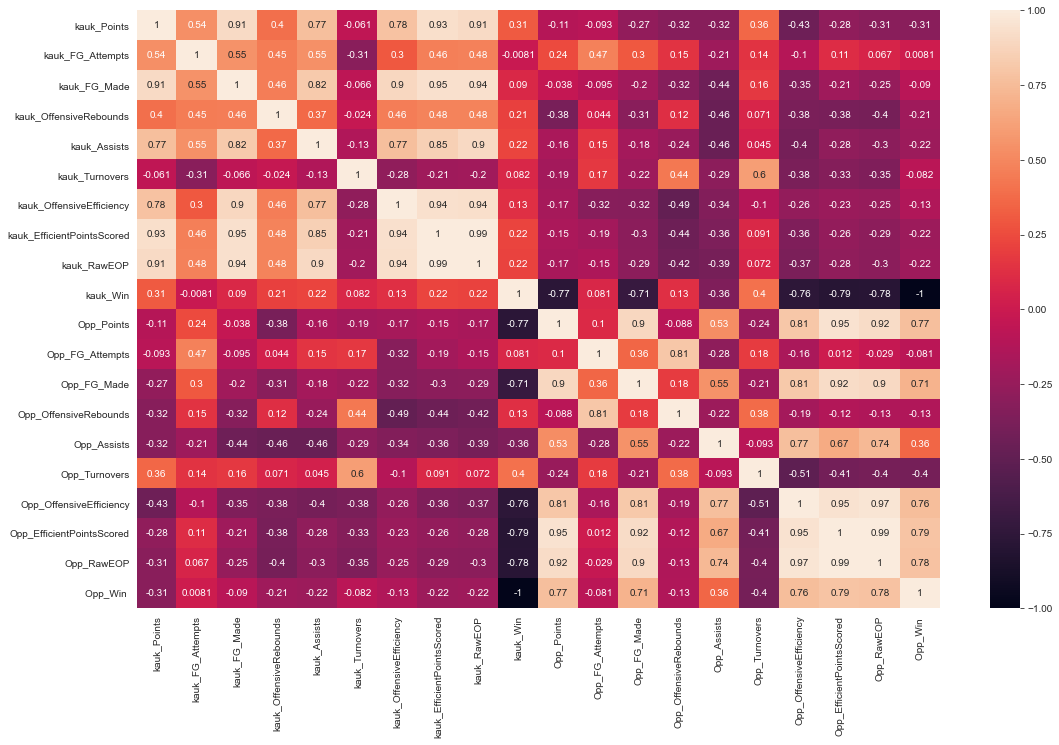

In [305]:
#Kaukauna FVA game correlations
plt.figure(figsize=(18,11))
sns.heatmap(kaukauna_game.corr(), annot = True);

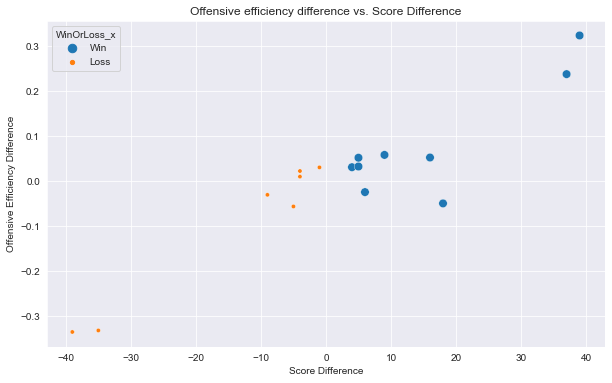

In [306]:
kaukauna_game['ScoreDifference'] = kaukauna_game['kauk_Points'] - kaukauna_game['Opp_Points']
kaukauna_game['OffensiveEfficiencyDifference'] = kaukauna_game['kauk_OffensiveEfficiency'] - kaukauna_game['Opp_OffensiveEfficiency']
kaukauna_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = kaukauna_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [307]:
# Kimberly offense correlations
kimberly_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.581548        0.928847   
FieldGoalAttempts          0.581548           1.000000        0.483394   
FieldGoalsMade             0.928847           0.483394        1.000000   
OffensiveRebounds         -0.062762           0.241114       -0.102282   
Assists                    0.663900           0.224153        0.786576   
Turnovers                  0.066122           0.061962        0.059548   
OffensiveEfficiency        0.463016          -0.211099        0.614679   
EfficientPointsScored      0.923485           0.332857        0.945481   
RawEOP                     0.891651           0.316457        0.947953   
Loss                      -0.645523          -0.145683       -0.649507   
Win                        0.645523           0.145683        0.649507   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                   -0.062762  0.663900   0.066122   
FieldGoalAttempts               0.241114  0.224153   0.061962   
FieldGoalsMade                 -0.102282  0.786576   0.059548   
OffensiveRebounds               1.000000 -0.063389   0.220325   
Assists                        -0.063389  1.000000  -0.019785   
Turnovers                       0.220325 -0.019785   1.000000   
OffensiveEfficiency             0.149158  0.717543  -0.162841   
EfficientPointsScored          -0.017116  0.798584  -0.046668   
RawEOP                         -0.022519  0.826733  -0.053723   
Loss                            0.213250 -0.698928  -0.078069   
Win                            -0.213250  0.698928   0.078069   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.463016               0.923485  0.891651   
FieldGoalAttempts                -0.211099               0.332857  0.316457   
FieldGoalsMade                    0.614679               0.945481  0.947953   
OffensiveRebounds                 0.149158              -0.017116 -0.022519   
Assists                           0.717543               0.798584  0.826733   
Turnovers                        -0.162841              -0.046668 -0.053723   
OffensiveEfficiency               1.000000               0.759431  0.778474   
EfficientPointsScored             0.759431               1.000000  0.989072   
RawEOP                            0.778474               0.989072  1.000000   
Loss                             -0.491877              -0.648095 -0.630689   
Win                               0.491877               0.648095  0.630689   

                           Loss       Win  
PointsScored          -0.645523  0.645523  
FieldGoalAttempts     -0.145683  0.145683  
FieldGoalsMade        -0.649507  0.649507  
OffensiveRebounds      0.213250 -0.213250  
Assists               -0.698928  0.698928  
Turnovers             -0.078069  0.078069  
OffensiveEfficiency   -0.491877  0.491877  
EfficientPointsScored -0.648095  0.648095  
RawEOP                -0.630689  0.630689  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [308]:
# Kimberly offense compared in wins and losses 
kimberly_win = kimberly_num[kimberly_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss = kimberly_num[kimberly_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_offense = pd.concat(frames)
kimberly_offense

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         15.000000               15.0       15.000000   
Averages in Wins       86.133333               61.6       34.333333   
Number of Losses        2.000000                2.0        2.000000   
Averages in Losses     59.500000               58.5       23.500000   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins                   15.0  15.000000       15.0   
Averages in Wins                 10.2  18.733333        8.6   
Number of Losses                  2.0   2.000000        2.0   
Averages in Losses               13.0  10.000000        8.0   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                15.000000              15.000000  15.000000  
Averages in Wins               0.672844              58.181726  66.840738  
Number of Losses               2.000000               2.000000   2.000000  
Averages in Losses             0.558477              32.755495  37.102826

In [309]:
# Kimberly opponent's offense correlations
kimberly_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.571125        0.910384   
FieldGoalAttempts          0.571125           1.000000        0.438806   
FieldGoalsMade             0.910384           0.438806        1.000000   
OffensiveRebounds          0.163428           0.050001        0.336123   
Assists                    0.617297           0.368419        0.680832   
Turnovers                  0.152373          -0.153139        0.364983   
OffensiveEfficiency        0.649215          -0.014674        0.739288   
EfficientPointsScored      0.902411           0.288993        0.917171   
RawEOP                     0.870793           0.285875        0.905353   
Loss                      -0.042854          -0.020754       -0.093311   
Win                        0.042854           0.020754        0.093311   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.163428  0.617297   0.152373   
FieldGoalAttempts               0.050001  0.368419  -0.153139   
FieldGoalsMade                  0.336123  0.680832   0.364983   
OffensiveRebounds               1.000000  0.191884   0.652881   
Assists                         0.191884  1.000000   0.186570   
Turnovers                       0.652881  0.186570   1.000000   
OffensiveEfficiency             0.171627  0.701961   0.030141   
EfficientPointsScored           0.197850  0.739959   0.134535   
RawEOP                          0.207761  0.813649   0.148466   
Loss                           -0.184310  0.006197   0.314095   
Win                             0.184310 -0.006197  -0.314095   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.649215               0.902411  0.870793   
FieldGoalAttempts                -0.014674               0.288993  0.285875   
FieldGoalsMade                    0.739288               0.917171  0.905353   
OffensiveRebounds                 0.171627               0.197850  0.207761   
Assists                           0.701961               0.739959  0.813649   
Turnovers                         0.030141               0.134535  0.148466   
OffensiveEfficiency               1.000000               0.909899  0.921762   
EfficientPointsScored             0.909899               1.000000  0.992236   
RawEOP                            0.921762               0.992236  1.000000   
Loss                             -0.352182              -0.194474 -0.175065   
Win                               0.352182               0.194474  0.175065   

                           Loss       Win  
PointsScored          -0.042854  0.042854  
FieldGoalAttempts     -0.020754  0.020754  
FieldGoalsMade        -0.093311  0.093311  
OffensiveRebounds     -0.184310  0.184310  
Assists                0.006197 -0.006197  
Turnovers              0.314095 -0.314095  
OffensiveEfficiency   -0.352182  0.352182  
EfficientPointsScored -0.194474  0.194474  
RawEOP                -0.175065  0.175065  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [310]:
# Kimberly opponent's offense compared in wins and losses 
kimberly_win_opp = kimberly_opp_num[kimberly_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss_opp = kimberly_opp_num[kimberly_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_opponent = pd.concat(frames)
kimberly_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         12.000000          12.000000       12.000000   
Averages in Wins       60.583333          51.416667       20.583333   
Number of Losses        1.000000           1.000000        1.000000   
Averages in Losses     62.000000          52.000000       22.000000   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins              12.000000  12.000000      12.00   
Averages in Wins             5.666667  11.083333      13.75   
Number of Losses             1.000000   1.000000       1.00   
Averages in Losses           7.000000  11.000000       7.00   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                12.000000              12.000000  12.000000  
Averages in Wins               0.445968              27.374613  31.226201  
Number of Losses               1.000000               1.000000   1.000000  
Averages in Losses             0.523810              32.476190  36.855238

In [311]:
#FVA Kimberly games 
game = [kimberly, kimberly_opp]
kimberly_game = pd.concat(game)
kimberly_game = pd.merge(left = kimberly, right = kimberly_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
kimberly_game = kimberly_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
kimberly_game = kimberly_game.rename(columns = {'PointsScored_x': 'Kim_Points', 'FieldGoalAttempts_x': 'Kim_FG_Attempts', 'FieldGoalsMade_x': 'Kim_FG_Made', 'OffensiveRebounds_x': 'Kim_OffensiveRebounds' , 'Assists_x': 'Kim_Assists', 'Turnovers_x': 'Kim_Turnovers', 'OffensiveEfficiency_x': 'Kim_OffensiveEfficiency', 'EfficientPointsScored_x': 'Kim_EfficientPointsScored', 'RawEOP_x': 'Kim_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'Kim_Win', 'Win_y' : 'Opp_Win '})

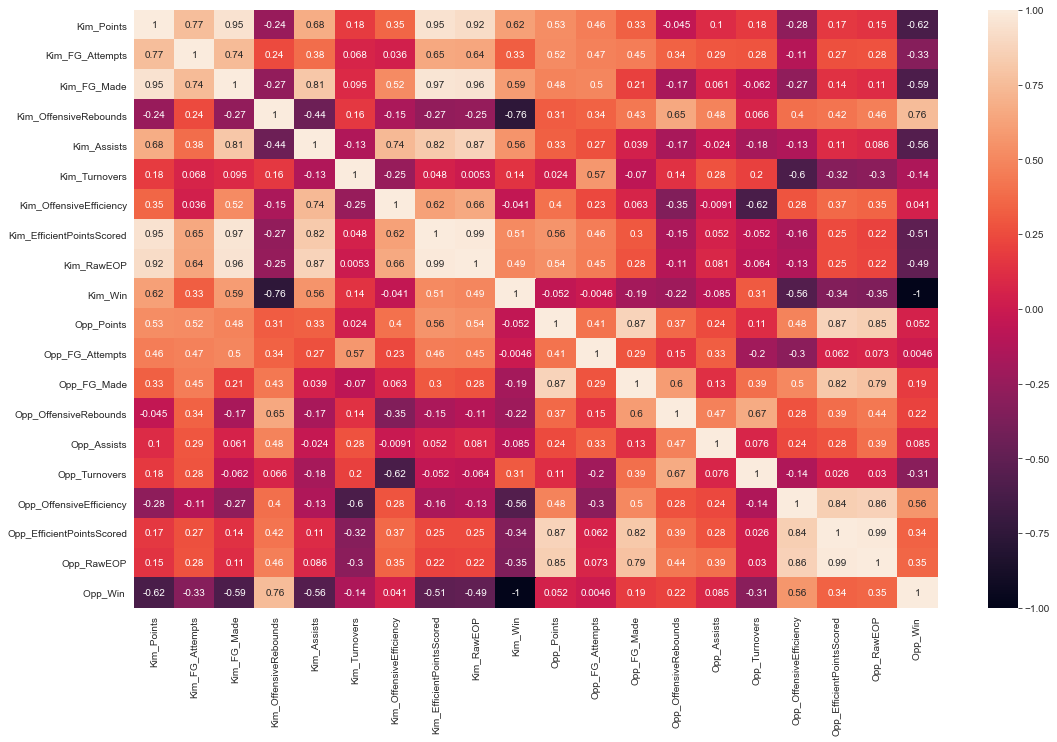

In [312]:
plt.figure(figsize = (18,11))
sns.heatmap(kimberly_game.corr(), annot = True);

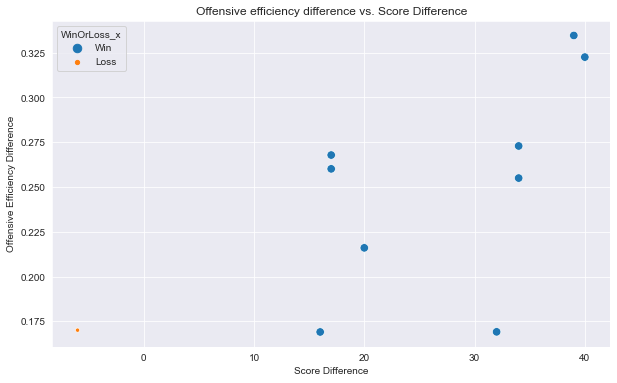

In [313]:
kimberly_game['ScoreDifference'] = kimberly_game['Kim_Points'] - kimberly_game['Opp_Points']
kimberly_game['OffensiveEfficiencyDifference'] = kimberly_game['Kim_OffensiveEfficiency'] - kimberly_game['Opp_OffensiveEfficiency']
kimberly_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = kimberly_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [314]:
# Neenah offense correlations
neenah_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.607882        0.837714   
FieldGoalAttempts          0.607882           1.000000        0.822967   
FieldGoalsMade             0.837714           0.822967        1.000000   
OffensiveRebounds          0.366092           0.614166        0.429796   
Assists                    0.489916           0.497794        0.675972   
Turnovers                  0.126364           0.049611        0.190614   
OffensiveEfficiency        0.691720           0.414044        0.711849   
EfficientPointsScored      0.959558           0.584210        0.849772   
RawEOP                     0.924637           0.603846        0.872366   
Loss                       0.080439           0.093916        0.126461   
Win                       -0.080439          -0.093916       -0.126461   

                       OffensiveRebounds       Assists  Turnovers  \
PointsScored                    0.366092  4.899163e-01   0.126364   
FieldGoalAttempts               0.614166  4.977944e-01   0.049611   
FieldGoalsMade                  0.429796  6.759717e-01   0.190614   
OffensiveRebounds               1.000000  2.694826e-01   0.328134   
Assists                         0.269483  1.000000e+00   0.330310   
Turnovers                       0.328134  3.303105e-01   1.000000   
OffensiveEfficiency             0.382178  6.305385e-01  -0.105351   
EfficientPointsScored           0.399293  5.738621e-01   0.021081   
RawEOP                          0.400802  7.061439e-01   0.070581   
Loss                           -0.261032  5.235800e-18  -0.205637   
Win                             0.261032  5.131084e-17   0.205637   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.691720               0.959558  0.924637   
FieldGoalAttempts                 0.414044               0.584210  0.603846   
FieldGoalsMade                    0.711849               0.849772  0.872366   
OffensiveRebounds                 0.382178               0.399293  0.400802   
Assists                           0.630538               0.573862  0.706144   
Turnovers                        -0.105351               0.021081  0.070581   
OffensiveEfficiency               1.000000               0.861932  0.889197   
EfficientPointsScored             0.861932               1.000000  0.984614   
RawEOP                            0.889197               0.984614  1.000000   
Loss                              0.021949               0.057815  0.047565   
Win                              -0.021949              -0.057815 -0.047565   

                               Loss           Win  
PointsScored           8.043948e-02 -8.043948e-02  
FieldGoalAttempts      9.391566e-02 -9.391566e-02  
FieldGoalsMade         1.264612e-01 -1.264612e-01  
OffensiveRebounds     -2.610322e-01  2.610322e-01  
Assists                5.235800e-18  5.131084e-17  
Turnovers             -2.056371e-01  2.056371e-01  
OffensiveEfficiency    2.194923e-02 -2.194923e-02  
EfficientPointsScored  5.781499e-02 -5.781499e-02  
RawEOP                 4.756540e-02 -4.756540e-02  
Loss                   1.000000e+00 -1.000000e+00  
Win                   -1.000000e+00  1.000000e+00

In [315]:
# Neenah offense compared in wins and losses
neenah_win = neenah_num[neenah_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss = neenah_num[neenah_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_offense = pd.concat(frames)
neenah_offense 

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         21.000000          21.000000       21.000000   
Averages in Wins       73.142857          52.285714       27.619048   
Number of Losses        1.000000           1.000000        1.000000   
Averages in Losses     77.000000          55.000000       30.000000   

                    OffensiveRebounds  Assists  Turnovers  \
Number of Wins              21.000000     21.0   21.00000   
Averages in Wins             9.190476     18.0   10.47619   
Number of Losses             1.000000      1.0    1.00000   
Averages in Losses           5.000000     18.0    7.00000   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                21.000000               21.00000  21.000000  
Averages in Wins               0.634836               46.78752  55.558049  
Number of Losses               1.000000                1.00000   1.000000  
Averages in Losses             0.640000               49.28000  58.035200

In [316]:
# Neenah opponent's offense correlations
neenah_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.556818        0.913449   
FieldGoalAttempts          0.556818           1.000000        0.772517   
FieldGoalsMade             0.913449           0.772517        1.000000   
OffensiveRebounds          0.209839           0.652341        0.405013   
Assists                    0.768052           0.366198        0.743902   
Turnovers                 -0.143364          -0.272877       -0.312265   
OffensiveEfficiency        0.690750           0.442826        0.778634   
EfficientPointsScored      0.943930           0.586905        0.939831   
RawEOP                     0.932952           0.557271        0.931008   
Loss                      -0.351494          -0.229049       -0.402351   
Win                        0.351494           0.229049        0.402351   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.209839  0.768052  -0.143364   
FieldGoalAttempts               0.652341  0.366198  -0.272877   
FieldGoalsMade                  0.405013  0.743902  -0.312265   
OffensiveRebounds               1.000000  0.071366  -0.235586   
Assists                         0.071366  1.000000  -0.191867   
Turnovers                      -0.235586 -0.191867   1.000000   
OffensiveEfficiency             0.453704  0.698283  -0.666297   
EfficientPointsScored           0.354415  0.795303  -0.407003   
RawEOP                          0.342110  0.817289  -0.408686   
Loss                            0.021296 -0.447853   0.105357   
Win                            -0.021296  0.447853  -0.105357   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.690750               0.943930  0.932952   
FieldGoalAttempts                 0.442826               0.586905  0.557271   
FieldGoalsMade                    0.778634               0.939831  0.931008   
OffensiveRebounds                 0.453704               0.354415  0.342110   
Assists                           0.698283               0.795303  0.817289   
Turnovers                        -0.666297              -0.407003 -0.408686   
OffensiveEfficiency               1.000000               0.880977  0.897409   
EfficientPointsScored             0.880977               1.000000  0.996345   
RawEOP                            0.897409               0.996345  1.000000   
Loss                             -0.288251              -0.375680 -0.346474   
Win                               0.288251               0.375680  0.346474   

                           Loss       Win  
PointsScored          -0.351494  0.351494  
FieldGoalAttempts     -0.229049  0.229049  
FieldGoalsMade        -0.402351  0.402351  
OffensiveRebounds      0.021296 -0.021296  
Assists               -0.447853  0.447853  
Turnovers              0.105357 -0.105357  
OffensiveEfficiency   -0.288251  0.288251  
EfficientPointsScored -0.375680  0.375680  
RawEOP                -0.346474  0.346474  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [317]:
# Neenah opponent's offense compared in wins and losses 
neenah_win_opp = neenah_opp_num[neenah_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss_opp = neenah_opp_num[neenah_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_opponent = pd.concat(frames)
neenah_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins         14.000000          14.000000       14.000000   
Averages in Wins       53.428571          42.071429       18.071429   
Number of Losses        2.000000           2.000000        2.000000   
Averages in Losses     68.500000          47.500000       25.000000   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins              14.000000  14.000000  14.000000   
Averages in Wins             6.785714  10.857143  13.357143   
Number of Losses             2.000000   2.000000   2.000000   
Averages in Losses           6.500000  15.000000  11.500000   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                14.000000              14.000000  14.000000  
Averages in Wins               0.489554              26.982727  31.170351  
Number of Losses               2.000000               2.000000   2.000000  
Averages in Losses             0.585616              41.698630  45.954110

In [318]:
#FVA Neenah games 
game = [neenah, neenah_opp]
neenah_game = pd.concat(game)
neenah_game = pd.merge(left = neenah, right = neenah_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
neenah_game = neenah_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
neenah_game = neenah_game.rename(columns = {'PointsScored_x': 'Nee_Points', 'FieldGoalAttempts_x': 'Nee_FG_Attempts', 'FieldGoalsMade_x': 'Nee_FG_Made', 'OffensiveRebounds_x': 'Nee_OffensiveRebounds' , 'Assists_x': 'Nee_Assists', 'Turnovers_x': 'Nee_Turnovers', 'OffensiveEfficiency_x': 'Nee_OffensiveEfficiency', 'EfficientPointsScored_x': 'Nee_EfficientPointsScored', 'RawEOP_x': 'Kim_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'Nee_Win', 'Win_y' : 'Opp_Win '})

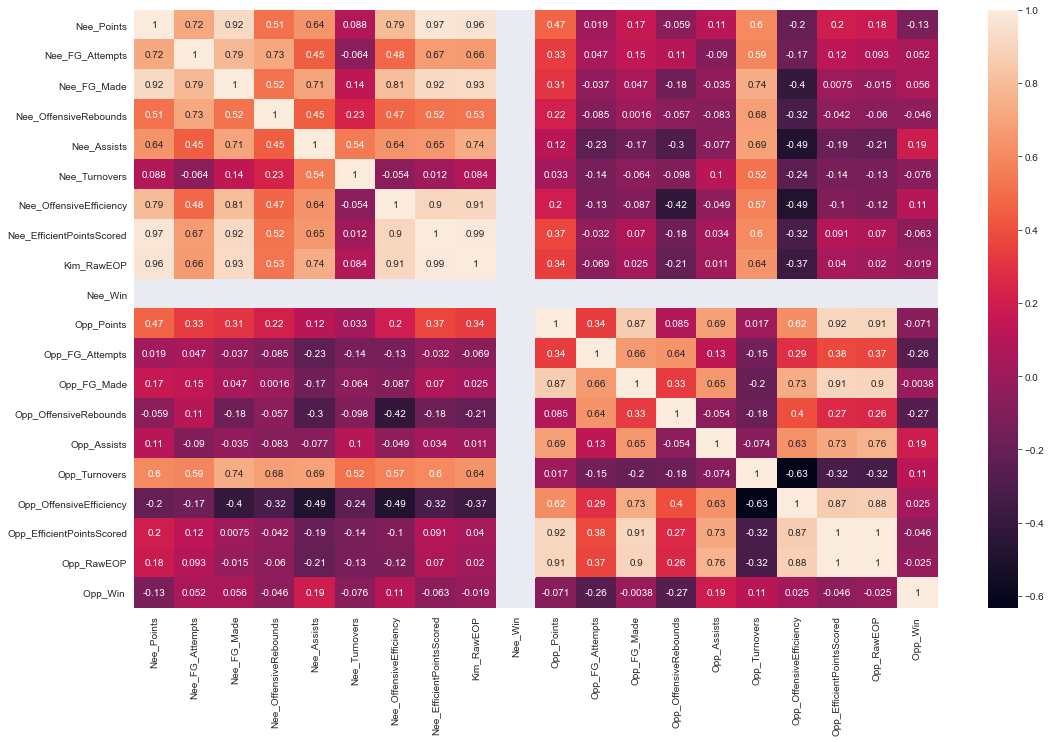

In [319]:
plt.figure(figsize = (18, 11))
sns.heatmap(neenah_game.corr(), annot = True);

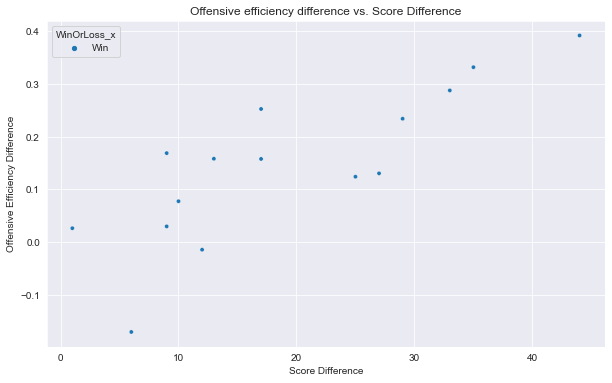

In [320]:
neenah_game['ScoreDifference'] = neenah_game['Nee_Points'] - neenah_game['Opp_Points']
neenah_game['OffensiveEfficiencyDifference'] = neenah_game['Nee_OffensiveEfficiency'] - neenah_game['Opp_OffensiveEfficiency']
neenah_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = neenah_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [321]:
# Oshkosh North offense correlations
oshkosh_north_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.584716        0.915549   
FieldGoalAttempts          0.584716           1.000000        0.714874   
FieldGoalsMade             0.915549           0.714874        1.000000   
OffensiveRebounds          0.147417           0.610996        0.244708   
Assists                    0.523737           0.312072        0.475020   
Turnovers                 -0.144103           0.194950        0.045175   
OffensiveEfficiency        0.744698           0.193250        0.669739   
EfficientPointsScored      0.929936           0.425710        0.845985   
RawEOP                     0.901096           0.415479        0.826504   
Loss                      -0.468198          -0.297083       -0.463503   
Win                        0.468198           0.297083        0.463503   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.147417  0.523737  -0.144103   
FieldGoalAttempts               0.610996  0.312072   0.194950   
FieldGoalsMade                  0.244708  0.475020   0.045175   
OffensiveRebounds               1.000000  0.149106   0.084153   
Assists                         0.149106  1.000000  -0.020126   
Turnovers                       0.084153 -0.020126   1.000000   
OffensiveEfficiency             0.193571  0.613508  -0.481025   
EfficientPointsScored           0.187713  0.620962  -0.343258   
RawEOP                          0.206279  0.699869  -0.322305   
Loss                           -0.420778 -0.392756   0.086989   
Win                             0.420778  0.392756  -0.086989   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.744698               0.929936  0.901096   
FieldGoalAttempts                 0.193250               0.425710  0.415479   
FieldGoalsMade                    0.669739               0.845985  0.826504   
OffensiveRebounds                 0.193571               0.187713  0.206279   
Assists                           0.613508               0.620962  0.699869   
Turnovers                        -0.481025              -0.343258 -0.322305   
OffensiveEfficiency               1.000000               0.930992  0.942214   
EfficientPointsScored             0.930992               1.000000  0.992061   
RawEOP                            0.942214               0.992061  1.000000   
Loss                             -0.547796              -0.563072 -0.584447   
Win                               0.547796               0.563072  0.584447   

                           Loss       Win  
PointsScored          -0.468198  0.468198  
FieldGoalAttempts     -0.297083  0.297083  
FieldGoalsMade        -0.463503  0.463503  
OffensiveRebounds     -0.420778  0.420778  
Assists               -0.392756  0.392756  
Turnovers              0.086989 -0.086989  
OffensiveEfficiency   -0.547796  0.547796  
EfficientPointsScored -0.563072  0.563072  
RawEOP                -0.584447  0.584447  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [322]:
# Oshkosh North offense compared in wins and losses 
oshkosh_north_win = oshkosh_north_num[oshkosh_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss = oshkosh_north_num[oshkosh_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_offense = pd.concat(frames)
oshkosh_north_offense

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          6.000000           6.000000        6.000000   
Averages in Wins       77.333333          52.833333       27.666667   
Number of Losses       14.000000          14.000000       14.000000   
Averages in Losses     67.785714          47.928571       22.785714   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               6.000000   6.000000   6.000000   
Averages in Wins             9.833333  15.166667  14.166667   
Number of Losses            14.000000  14.000000  14.000000   
Averages in Losses           6.285714  12.142857  14.928571   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 6.000000               6.000000   6.000000  
Averages in Wins               0.590601              45.951372  52.895627  
Number of Losses              14.000000              14.000000  14.000000  
Averages in Losses             0.508966              34.826483  39.385442

In [323]:
# Oshkosh North opponent's offense correlations
oshkosh_north_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.670417        0.848441   
FieldGoalAttempts          0.670417           1.000000        0.839276   
FieldGoalsMade             0.848441           0.839276        1.000000   
OffensiveRebounds          0.431779           0.757495        0.716035   
Assists                    0.111073          -0.026305        0.232809   
Turnovers                 -0.368560           0.084975       -0.099924   
OffensiveEfficiency        0.591355           0.208371        0.642729   
EfficientPointsScored      0.929782           0.546489        0.862335   
RawEOP                     0.856884           0.477782        0.828063   
Loss                      -0.500662          -0.075934       -0.216222   
Win                        0.500662           0.075934        0.216222   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.431779  0.111073  -0.368560   
FieldGoalAttempts               0.757495 -0.026305   0.084975   
FieldGoalsMade                  0.716035  0.232809  -0.099924   
OffensiveRebounds               1.000000  0.296685   0.361955   
Assists                         0.296685  1.000000   0.079212   
Turnovers                       0.361955  0.079212   1.000000   
OffensiveEfficiency             0.414334  0.724100  -0.339797   
EfficientPointsScored           0.467891  0.394657  -0.413669   
RawEOP                          0.472651  0.547483  -0.365165   
Loss                            0.143851 -0.140667   0.552270   
Win                            -0.143851  0.140667  -0.552270   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.591355               0.929782  0.856884   
FieldGoalAttempts                 0.208371               0.546489  0.477782   
FieldGoalsMade                    0.642729               0.862335  0.828063   
OffensiveRebounds                 0.414334               0.467891  0.472651   
Assists                           0.724100               0.394657  0.547483   
Turnovers                        -0.339797              -0.413669 -0.365165   
OffensiveEfficiency               1.000000               0.842599  0.909807   
EfficientPointsScored             0.842599               1.000000  0.982738   
RawEOP                            0.909807               0.982738  1.000000   
Loss                             -0.373561              -0.485050 -0.457253   
Win                               0.373561               0.485050  0.457253   

                           Loss       Win  
PointsScored          -0.500662  0.500662  
FieldGoalAttempts     -0.075934  0.075934  
FieldGoalsMade        -0.216222  0.216222  
OffensiveRebounds      0.143851 -0.143851  
Assists               -0.140667  0.140667  
Turnovers              0.552270 -0.552270  
OffensiveEfficiency   -0.373561  0.373561  
EfficientPointsScored -0.485050  0.485050  
RawEOP                -0.457253  0.457253  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [324]:
# Oshkosh North opponent's offense compared in wins and losses 
oshkosh_north_win_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_opponent = pd.concat(frames)
oshkosh_north_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          4.000000           4.000000        4.000000   
Averages in Wins       63.750000          55.000000       24.750000   
Number of Losses       11.000000          11.000000       11.000000   
Averages in Losses     78.181818          56.363636       27.454545   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               4.000000   4.000000   4.000000   
Averages in Wins            10.500000  14.750000  14.500000   
Number of Losses            11.000000  11.000000  11.000000   
Averages in Losses           9.454545  16.272727  10.181818   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 4.000000               4.000000   4.000000  
Averages in Wins               0.530239              33.861236  40.126604  
Number of Losses              11.000000              11.000000  11.000000  
Averages in Losses             0.594221              46.968346  54.205139

In [325]:
#FVA Oshkosh North games 
game = [oshkosh_north, oshkosh_north_opp]
oshkosh_north_game = pd.concat(game)
oshkosh_north_game = pd.merge(left = oshkosh_north, right = oshkosh_north_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
oshkosh_north_game = oshkosh_north_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
oshkosh_north_game = oshkosh_north_game.rename(columns = {'PointsScored_x': 'ON_Points', 'FieldGoalAttempts_x': 'ON_FG_Attempts', 'FieldGoalsMade_x': 'ON_FG_Made', 'OffensiveRebounds_x': 'ON_OffensiveRebounds' , 'Assists_x': 'ON_Assists', 'Turnovers_x': 'ON_Turnovers', 'OffensiveEfficiency_x': 'ON_OffensiveEfficiency', 'EfficientPointsScored_x': 'ON_EfficientPointsScored', 'RawEOP_x': 'ON_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'ON_Win', 'Win_y' : 'Opp_Win '})

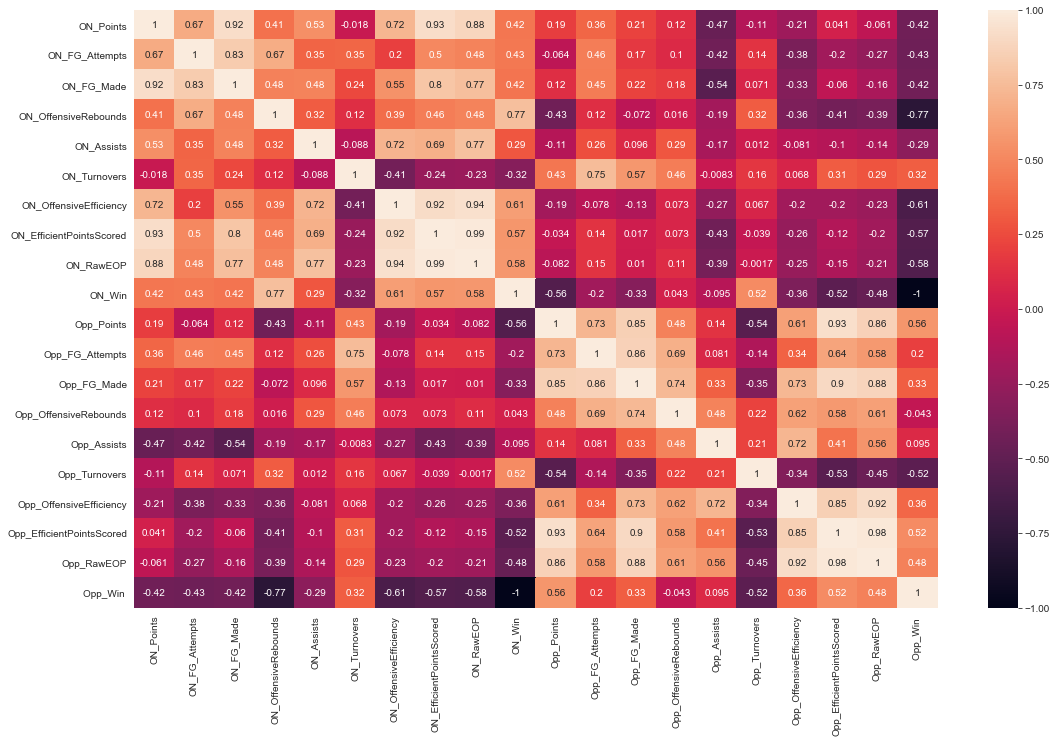

In [326]:
plt.figure(figsize = (18,11))
sns.heatmap(oshkosh_north_game.corr(), annot = True);

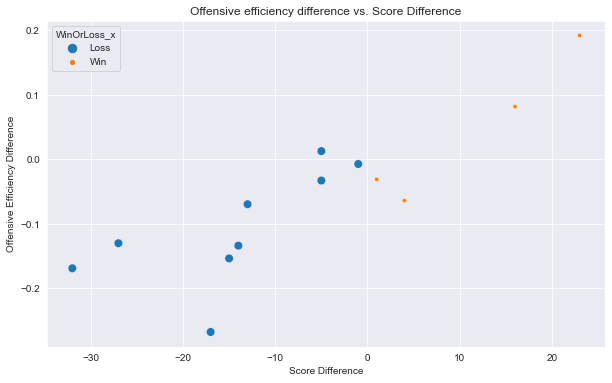

In [327]:
oshkosh_north_game['ScoreDifference'] = oshkosh_north_game['ON_Points'] - oshkosh_north_game['Opp_Points']
oshkosh_north_game['OffensiveEfficiencyDifference'] = oshkosh_north_game['ON_OffensiveEfficiency'] - oshkosh_north_game['Opp_OffensiveEfficiency']
oshkosh_north_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = oshkosh_north_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [328]:
# Oshkosh West offense correlations
oshkosh_west_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.392947        0.836423   
FieldGoalAttempts          0.392947           1.000000        0.426831   
FieldGoalsMade             0.836423           0.426831        1.000000   
OffensiveRebounds          0.284471           0.747958        0.255545   
Assists                    0.491872           0.092675        0.488761   
Turnovers                 -0.250623          -0.523880       -0.218637   
OffensiveEfficiency        0.720816           0.075332        0.784362   
EfficientPointsScored      0.917889           0.231711        0.878663   
RawEOP                     0.892212           0.212288        0.862923   
Loss                      -0.574268           0.095195       -0.411673   
Win                        0.574268          -0.095195        0.411673   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.284471  0.491872  -0.250623   
FieldGoalAttempts               0.747958  0.092675  -0.523880   
FieldGoalsMade                  0.255545  0.488761  -0.218637   
OffensiveRebounds               1.000000  0.227594  -0.351508   
Assists                         0.227594  1.000000   0.164165   
Turnovers                      -0.351508  0.164165   1.000000   
OffensiveEfficiency             0.208287  0.623959  -0.323577   
EfficientPointsScored           0.260498  0.587996  -0.295579   
RawEOP                          0.269572  0.694258  -0.237321   
Loss                           -0.026476 -0.122103   0.364200   
Win                             0.026476  0.122103  -0.364200   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.720816               0.917889  0.892212   
FieldGoalAttempts                 0.075332               0.231711  0.212288   
FieldGoalsMade                    0.784362               0.878663  0.862923   
OffensiveRebounds                 0.208287               0.260498  0.269572   
Assists                           0.623959               0.587996  0.694258   
Turnovers                        -0.323577              -0.295579 -0.237321   
OffensiveEfficiency               1.000000               0.932109  0.942398   
EfficientPointsScored             0.932109               1.000000  0.989998   
RawEOP                            0.942398               0.989998  1.000000   
Loss                             -0.629460              -0.658559 -0.609015   
Win                               0.629460               0.658559  0.609015   

                           Loss       Win  
PointsScored          -0.574268  0.574268  
FieldGoalAttempts      0.095195 -0.095195  
FieldGoalsMade        -0.411673  0.411673  
OffensiveRebounds     -0.026476  0.026476  
Assists               -0.122103  0.122103  
Turnovers              0.364200 -0.364200  
OffensiveEfficiency   -0.629460  0.629460  
EfficientPointsScored -0.658559  0.658559  
RawEOP                -0.609015  0.609015  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [329]:
# Oshkosh West offense compared in wins and losses 
oshkosh_west_win = oshkosh_west_num[oshkosh_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss = oshkosh_west_num[oshkosh_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_offense = pd.concat(frames)
oshkosh_west_offense

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins          8.000000           8.000000        8.000000   
Averages in Wins       66.375000          48.625000       23.750000   
Number of Losses       11.000000          11.000000       11.000000   
Averages in Losses     57.181818          50.181818       20.636364   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               8.000000   8.000000   8.000000   
Averages in Wins             8.125000  13.000000  11.125000   
Number of Losses            11.000000  11.000000  11.000000   
Averages in Losses           7.909091  12.090909  14.636364   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 8.000000               8.000000   8.000000  
Averages in Wins               0.567477              37.855558  43.470031  
Number of Losses              11.000000              11.000000  11.000000  
Averages in Losses             0.471573              27.196747  31.722990

In [330]:
# Oshkosh West opponent's offense correlations
oshkosh_west_opp_num.corr()

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
PointsScored               1.000000           0.552109        0.774007   
FieldGoalAttempts          0.552109           1.000000        0.596860   
FieldGoalsMade             0.774007           0.596860        1.000000   
OffensiveRebounds          0.162476           0.701349        0.228223   
Assists                    0.504982           0.193465        0.656380   
Turnovers                 -0.026346          -0.286129        0.034245   
OffensiveEfficiency        0.586755           0.263752        0.841355   
EfficientPointsScored      0.896019           0.460962        0.912100   
RawEOP                     0.867684           0.457278        0.907404   
Loss                      -0.457087          -0.063948       -0.491910   
Win                        0.457087           0.063948        0.491910   

                       OffensiveRebounds   Assists  Turnovers  \
PointsScored                    0.162476  0.504982  -0.026346   
FieldGoalAttempts               0.701349  0.193465  -0.286129   
FieldGoalsMade                  0.228223  0.656380   0.034245   
OffensiveRebounds               1.000000 -0.022307   0.061938   
Assists                        -0.022307  1.000000   0.125096   
Turnovers                       0.061938  0.125096   1.000000   
OffensiveEfficiency             0.042843  0.830767  -0.062160   
EfficientPointsScored           0.112303  0.754545  -0.034003   
RawEOP                          0.133192  0.815039   0.026082   
Loss                            0.216511 -0.466090   0.212417   
Win                            -0.216511  0.466090  -0.212417   

                       OffensiveEfficiency  EfficientPointsScored    RawEOP  \
PointsScored                      0.586755               0.896019  0.867684   
FieldGoalAttempts                 0.263752               0.460962  0.457278   
FieldGoalsMade                    0.841355               0.912100  0.907404   
OffensiveRebounds                 0.042843               0.112303  0.133192   
Assists                           0.830767               0.754545  0.815039   
Turnovers                        -0.062160              -0.034003  0.026082   
OffensiveEfficiency               1.000000               0.879395  0.884525   
EfficientPointsScored             0.879395               1.000000  0.989954   
RawEOP                            0.884525               0.989954  1.000000   
Loss                             -0.633825              -0.589381 -0.584031   
Win                               0.633825               0.589381  0.584031   

                           Loss       Win  
PointsScored          -0.457087  0.457087  
FieldGoalAttempts     -0.063948  0.063948  
FieldGoalsMade        -0.491910  0.491910  
OffensiveRebounds      0.216511 -0.216511  
Assists               -0.466090  0.466090  
Turnovers              0.212417 -0.212417  
OffensiveEfficiency   -0.633825  0.633825  
EfficientPointsScored -0.589381  0.589381  
RawEOP                -0.584031  0.584031  
Loss                   1.000000 -1.000000  
Win                   -1.000000  1.000000

In [331]:
# Oshkosh West opponent's offense compared in wins and losses 
oshkosh_west_win_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_opponent = pd.concat(frames)
oshkosh_west_opponent

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins              4.00           4.000000        4.000000   
Averages in Wins           58.00          46.500000       19.000000   
Number of Losses           12.00          12.000000       12.000000   
Averages in Losses         65.75          47.416667       23.666667   

                    OffensiveRebounds    Assists  Turnovers  \
Number of Wins               4.000000   4.000000   4.000000   
Averages in Wins             9.000000  10.750000  13.750000   
Number of Losses            12.000000  12.000000  12.000000   
Averages in Losses           7.416667  14.916667  12.333333   

                    OffensiveEfficiency  EfficientPointsScored     RawEOP  
Number of Wins                 4.000000               4.000000   4.000000  
Averages in Wins               0.478013              27.908594  31.852875  
Number of Losses              12.000000              12.000000  12.000000  
Averages in Losses             0.570415              37.627055  43.841884

In [332]:
#FVA Oshkosh West games 
game = [oshkosh_west, oshkosh_west_opp]
oshkosh_west_game = pd.concat(game)
oshkosh_west_game = pd.merge(left = oshkosh_west, right = oshkosh_west_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
oshkosh_west_game = oshkosh_west_game.drop(columns = ['Opponent_x', 'Opponent_y',  'WinOrLoss_y', 'Loss_x', 'Loss_y'])
oshkosh_west_game = oshkosh_west_game.rename(columns = {'PointsScored_x': 'OW_Points', 'FieldGoalAttempts_x': 'OW_FG_Attempts', 'FieldGoalsMade_x': 'OW_FG_Made', 'OffensiveRebounds_x': 'OW_OffensiveRebounds' , 'Assists_x': 'OW_Assists', 'Turnovers_x': 'OW_Turnovers', 'OffensiveEfficiency_x': 'OW_OffensiveEfficiency', 'EfficientPointsScored_x': 'OW_EfficientPointsScored', 'RawEOP_x': 'OW_RawEOP' , 'PointsScored_y': 'Opp_Points', 'FieldGoalAttempts_y': 'Opp_FG_Attempts', 'FieldGoalsMade_y': 'Opp_FG_Made', 'OffensiveRebounds_y': 'Opp_OffensiveRebounds', 'Assists_y': 'Opp_Assists', 'Turnovers_y': 'Opp_Turnovers', 'OffensiveEfficiency_y': 'Opp_OffensiveEfficiency', 'EfficientPointsScored_y': 'Opp_EfficientPointsScored', 'RawEOP_y': 'Opp_RawEOP', 'Win_x' : 'OW_Win', 'Win_y' : 'Opp_Win '})

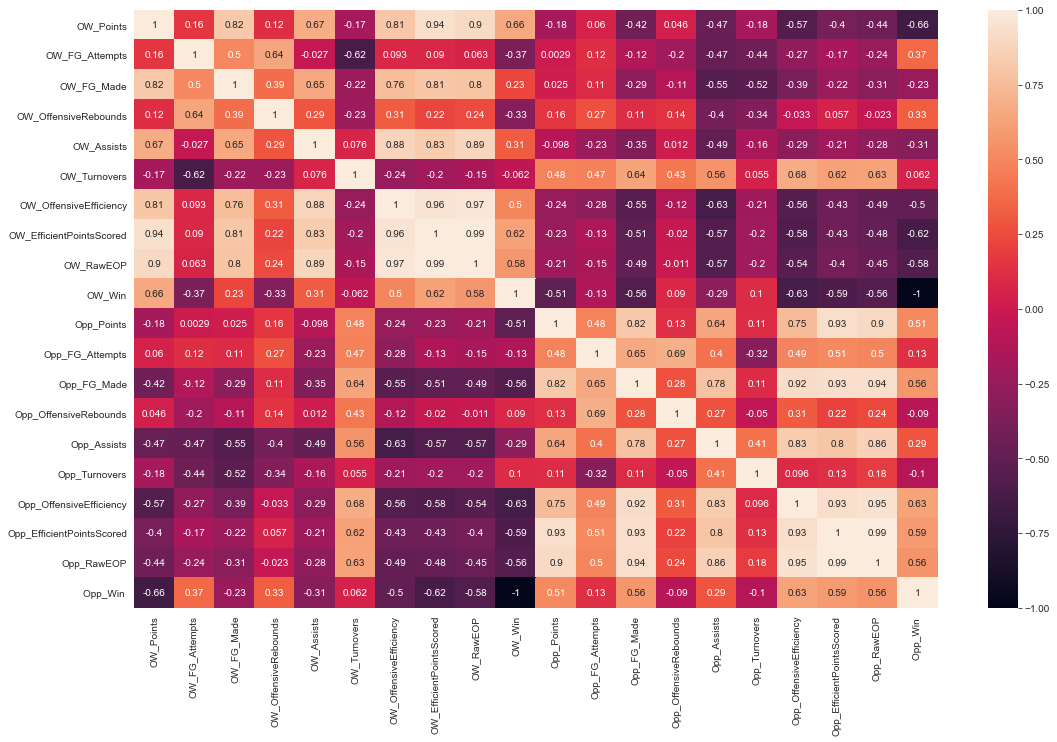

In [333]:
plt.figure(figsize = (18,11))
sns.heatmap(oshkosh_west_game.corr(), annot = True);

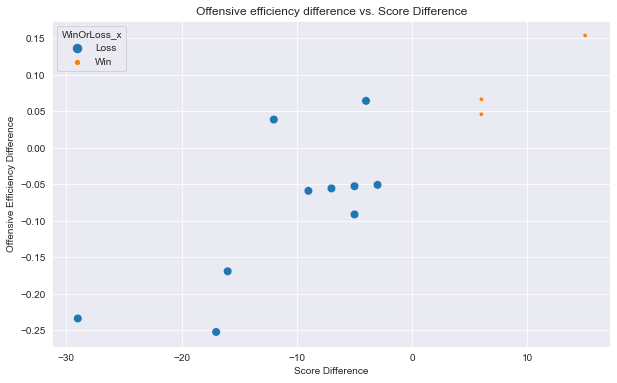

In [334]:
oshkosh_west_game['ScoreDifference'] = oshkosh_west_game['OW_Points'] - oshkosh_west_game['Opp_Points']
oshkosh_west_game['OffensiveEfficiencyDifference'] = oshkosh_west_game['OW_OffensiveEfficiency'] - oshkosh_west_game['Opp_OffensiveEfficiency']
oshkosh_west_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = oshkosh_west_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

In [335]:
#FVA games 
team = [appleton_east, appleton_north, appleton_west, fond_du_lac, hortonville, kaukauna, kimberly, neenah, oshkosh_north, oshkosh_west]
team_opp = [appleton_east_opp, appleton_north_opp, appleton_west_opp, fond_du_lac_opp, hortonville_opp, kaukauna_opp, kimberly_opp, neenah_opp, oshkosh_north_opp, oshkosh_west_opp]
team_opp = pd.concat(team_opp)
team = pd.concat(team)
fva_game = [team, team_opp]
fva_game = pd.concat(fva_game)
fva_game = pd.merge(left = team, right = team_opp, left_on = 'DateOfGame', right_on='DateOfGame' )
fva_game = fva_game.drop(columns = ['Opponent_x', 'Opponent_y', 'Win_x', 'Win_y', 'WinOrLoss_y', 'Loss_x', 'Loss_y'])
fva_game = fva_game.rename(columns = {'PointsScored_x': 'Team1_Points', 'FieldGoalAttempts_x': 'Team1_FG_Attempts', 'FieldGoalsMade_x': 'Team1_FG_Made', 'OffensiveRebounds_x': 'Team1_OffensiveRebounds' , 'Assists_x': 'Team1_Assists', 'Turnovers_x': 'Team1_Turnovers', 'OffensiveEfficiency_x': 'Team1_OffensiveEfficiency', 'EfficientPointsScored_x': 'Team1_EfficientPointsScored', 'RawEOP_x': 'Team1_RawEOP' , 'PointsScored_y': 'Team2_Points', 'FieldGoalAttempts_y': 'Team2_FG_Attempts', 'FieldGoalsMade_y': 'Team2_FG_Made', 'OffensiveRebounds_y': 'Team2_OffensiveRebounds', 'Assists_y': 'Team2_Assists', 'Turnovers_y': 'Team2_Turnovers', 'OffensiveEfficiency_y': 'Team2_OffensiveEfficiency', 'EfficientPointsScored_y': 'Team2_EfficientPointsScored', 'RawEOP_y': 'Team2_RawEOP', 'Win_x' : 'Team1_Win', 'Win_y' : 'Team2_Win '})
fva_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DateOfGame                   1108 non-null   object 
 1   Team_x                       1108 non-null   object 
 2   Team1_Points                 1108 non-null   int64  
 3   Team1_FG_Attempts            1108 non-null   int64  
 4   Team1_FG_Made                1108 non-null   int64  
 5   Team1_OffensiveRebounds      1108 non-null   int64  
 6   Team1_Assists                1108 non-null   int64  
 7   Team1_Turnovers              1108 non-null   int64  
 8   WinOrLoss_x                  1108 non-null   object 
 9   Team1_OffensiveEfficiency    1108 non-null   float64
 10  Team1_EfficientPointsScored  1108 non-null   float64
 11  Team1_RawEOP                 1108 non-null   float64
 12  Team_y                       1108 non-null   object 
 13  Team2_Points      

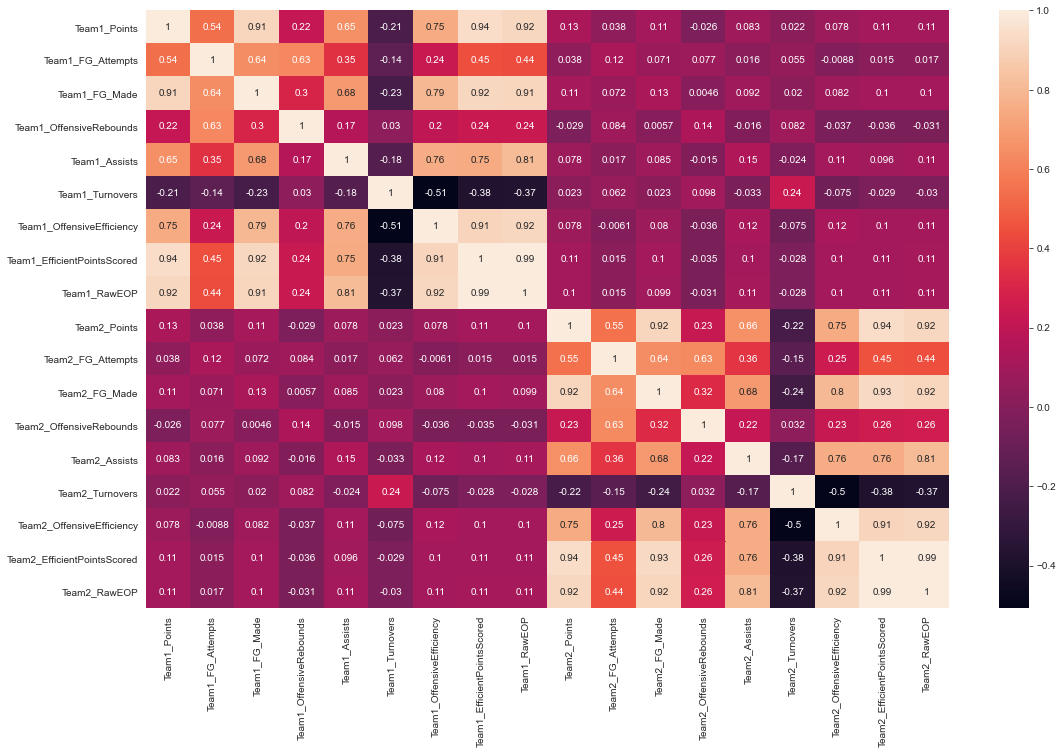

In [336]:
plt.figure(figsize = (18,11))
sns.heatmap(fva_game.corr(), annot = True);

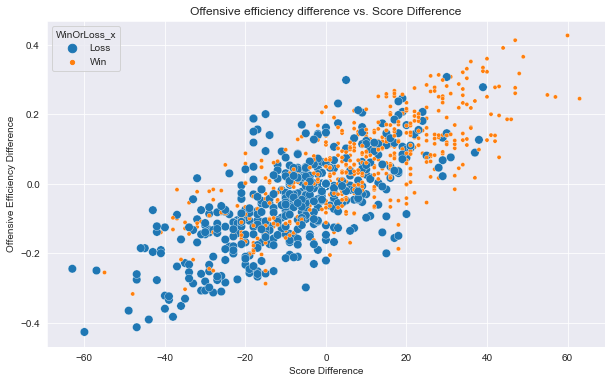

In [337]:
fva_game['ScoreDifference'] = fva_game['Team1_Points'] - fva_game['Team2_Points']
fva_game['OffensiveEfficiencyDifference'] = fva_game['Team1_OffensiveEfficiency'] - fva_game['Team2_OffensiveEfficiency']
fva_game[['ScoreDifference', 'OffensiveEfficiencyDifference']]
plt.figure(figsize=(10,6))
sns.scatterplot(data = fva_game, x = "ScoreDifference", y = "OffensiveEfficiencyDifference", hue = "WinOrLoss_x" , size = "WinOrLoss_x")
plt.ylabel("Offensive Efficiency Difference")
plt.xlabel("Score Difference")
plt.title("Offensive efficiency difference vs. Score Difference");

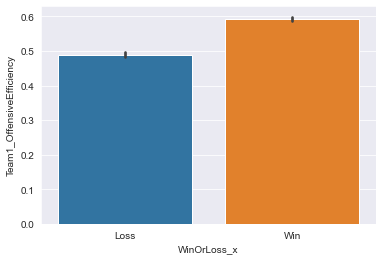

In [338]:
sns.barplot(x = fva_game['WinOrLoss_x'], y = fva_game['Team1_OffensiveEfficiency']);

In [339]:
fva_wins = [appleton_east_win, appleton_north_win, appleton_west_win, fond_du_lac_win, hortonville_win, kaukauna_win, kimberly_win, neenah_win, oshkosh_north_win, oshkosh_west_win]
fva_losses = [appleton_east_loss, appleton_north_loss, appleton_west_loss, fond_du_lac_loss, hortonville_loss, kimberly_loss, neenah_loss, oshkosh_north_loss, oshkosh_west_loss]
fva_wins = pd.concat(fva_wins)
fva_wins = fva_wins.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fva_losses = pd.concat(fva_losses)
fva_losses = fva_losses.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [fva_wins, fva_losses]
fva_compared = pd.concat(frames)
fva_compared

PointsScored  FieldGoalAttempts  FieldGoalsMade  \
Number of Wins        111.000000         111.000000      111.000000   
Averages in Wins       73.594595          52.981982       26.792793   
Number of Losses       85.000000          85.000000       85.000000   
Averages in Losses     58.470588          49.741176       21.011765   

                    OffensiveRebounds     Assists   Turnovers  \
Number of Wins             111.000000  111.000000  111.000000   
Averages in Wins             8.765766   16.063063   11.207207   
Number of Losses            85.000000   85.000000   85.000000   
Averages in Losses           7.388235   12.070588   13.729412   

                    OffensiveEfficiency  EfficientPointsScored      RawEOP  
Number of Wins               111.000000             111.000000  111.000000  
Averages in Wins               0.594511              44.458788   51.644344  
Number of Losses              85.000000              85.000000   85.000000  
Averages in Losses             0.483863              28.799288   33.359422

In [340]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [341]:
# Features for machine learning model
X = efficiency_fva_num.drop(columns = ['Loss', 'PointsScored'], axis = 1).values
X

array([[51.        , 20.        , 10.        , ..., 33.40677966,
        35.84135593,  1.        ],
       [48.        , 25.        ,  3.        , ..., 40.69565217,
        46.70956522,  1.        ],
       [56.        , 27.        ,  6.        , ..., 44.63291139,
        50.15493671,  1.        ],
       ...,
       [40.        , 20.        ,  6.        , ..., 30.46153846,
        37.19630769,  1.        ],
       [66.        , 33.        , 16.        , ..., 54.2278481 ,
        63.05924051,  1.        ],
       [44.        , 24.        ,  4.        , ..., 48.13432836,
        57.40179104,  1.        ]])

In [342]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.PointsScored
y.head()

0    73
1    72
2    86
3    72
4    61
Name: PointsScored, dtype: int64

In [343]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(164, 9) (42, 9) (164,) (42,)


In [344]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.12121212 0.06060606 0.03030303 0.12121212 0.1875    ]
0.10416666666666667


In [345]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.09090909 0.06060606 0.03030303 0.12121212 0.125     ]
0.0856060606060606


In [346]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.06060606 0.06060606 0.         0.03030303 0.03125   ]
0.0365530303030303


In [347]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.15151515 0.03030303 0.06060606 0.06060606 0.25      ]
0.1106060606060606


In [348]:
# Best Model
svc = SVC(probability = True)
r2 = cross_val_score(svc, train_X, train_y, cv = 5)
print(r2)
print(r2.mean())

[0.09090909 0.06060606 0.06060606 0.09090909 0.03125   ]
0.06685606060606061


In [349]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[21:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [350]:
reg = LinearRegression()
cv = cross_val_score(reg, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.97284323 0.98442116 0.97586823 0.99197187 0.95567985]
0.9761568673237491


In [351]:
reg.fit(train_X, train_y)
y_pred = reg.predict(val_X)
df = pd.DataFrame({'Actual': val_y, 'Predicted': y_pred})
df

Actual   Predicted
78       74   71.298436
97       59   59.698998
152      55   59.250082
44       82   80.986615
40       73   71.497088
67       51   50.925979
98       71   70.254699
18       96   95.728672
153      66   64.167379
62       56   59.939066
4        61   59.368208
173      68   67.242143
145      74   73.141236
38       54   55.689748
29       34   38.217496
171      68   71.023510
191      60   58.026772
33       66   64.854869
180      82   78.364423
190      37   39.839826
174      47   48.810537
31       72   70.101410
11      105  108.675974
119      84   83.590125
186      44   45.321890
34       74   72.855437
84       58   56.999010
185      61   62.245509
120      73   73.067047
35       81   77.291681
150      72   70.725113
28       64   62.063110
16       55   56.158630
130      67   66.173005
116      84   84.103473
183      86   85.614560
27       58   58.635222
47       62   60.933592
58       41   45.929697
205      75   75.202747
189      64   63.664168
106      59   59.088714

In [352]:
reg.intercept_

-4.674542838653778

In [353]:
reg.coef_

array([ 0.8801055 , -1.48039674, -0.95309302, -0.69513077,  0.98211559,
       14.74674332,  1.86840207, -0.2503894 ,  0.81929498])